In [2]:
import pandas as pd 
import numpy as np
import os 
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

# Set the style of the plots
markers = ['o', 's', 'D', 'v', 'p', 'P', 'X', 'h', 'H', 'd']
colors_discrete = sns.color_palette('tab10')
colors_continuous = sns.color_palette('viridis')
linestyles = ['-', '--', '-.', ':']

# Do not hide any columns
pd.set_option('display.max_columns', None)
sns.set_theme(style='whitegrid', font_scale=1)

In [3]:
results_path = 'results_v3'
images_dir = f'{results_path}/images'

os.makedirs(images_dir, exist_ok=True)

In [8]:
def process_results(results_path: str, ext: str = 'feather'):
    results_list = []

    # Read all the results from results/ directory
    for dirname in tqdm(os.listdir(results_path), desc='Reading results'):
        if 'images' not in dirname:
            if not os.path.isdir(f'{results_path}/{dirname}') or 'results' not in os.listdir(f'{results_path}/{dirname}'):
                continue
            for file in os.listdir(f'{results_path}/{dirname}/results'):
                if file.endswith(f'.{ext}'):
                    if ext == 'feather':
                        df = pd.read_feather(f'{results_path}/{dirname}/results/{file}')
                    else:
                        df = pd.read_csv(f'{results_path}/{dirname}/results/{file}')
                    
                    # Custom parsing kinda weird
                    if 'dt' in dirname:
                        df['base_model'] = 'DecisionTree'
                    else:
                        df['base_model'] = 'NeuralNetwork'
                        
                    if 'dice' in dirname:
                        df['base_cf_method'] = 'Dice'
                    else:
                        df['base_cf_method'] = 'GrowingSpheres'
                        
                    # Temporary fix for the experiment type
                    # ----------------------------
                    # exp_types = list(filter(lambda x: 'seed' not in x.lower(), df['experiment_type'].unique()))
                    # df = df[df['experiment_type'].isin(exp_types)]
                    # ----------------------------
                        
                    results_list.append(df)
    
    # Concatenate all the results
    raw_df: pd.DataFrame = pd.concat(results_list, ignore_index=True)
    return raw_df

In [10]:
supp_df = process_results('results_carla', ext='csv')

Reading results: 100%|██████████| 2/2 [00:00<00:00, 64.66it/s]


In [11]:
raw_df = process_results(results_path)

Reading results: 100%|██████████| 30/30 [00:16<00:00,  1.83it/s]


In [5]:
raw_df = raw_df.dropna()

In [13]:
supp_df['base_counterfactual_validity_model2'].value_counts()

1    57
0    33
Name: base_counterfactual_validity_model2, dtype: int64

In [6]:
raw_df.head(3)

,base_cf_method,model_type_to_use,experiment_type,dataset_name,k_mlps_in_B,fold_i,experiment_generalization_type,beta_confidence,delta_robustness,model2_name,x_test_sample,y_test_sample,model1_pred_proba,model1_pred_crisp,model2_pred_proba,model2_pred_crisp,base_counterfactual,base_counterfactual_model1_pred_proba,base_counterfactual_model1_pred_crisp,base_counterfactual_model2_pred_proba,base_counterfactual_model2_pred_crisp,base_counterfactual_validity,base_counterfactual_proximityL1,base_counterfactual_proximityL2,base_counterfactual_plausibility,base_counterfactual_discriminative_power,base_counterfactual_validity_model2,base_counterfactual_time,robust_counterfactual,robust_counterfactual_model1_pred_proba,robust_counterfactual_model1_pred_crisp,robust_counterfactual_model2_pred_proba,robust_counterfactual_model2_pred_crisp,robust_counterfactual_validity,robust_counterfactual_proximityL1,robust_counterfactual_proximityL2,robust_counterfactual_plausibility,robust_counterfactual_discriminative_power,robust_counterfactual_validity_model2,robust_counterfactual_L1_distance_from_base_cf,robust_counterfactual_L2_distance_from_base_cf,robust_counterfactual_time,start_sample_passes_test,counterfactual_does_not_pass_test,counterfactual_does_not_have_target_class,counterfactual_is_nan,highest_delta,lower_bound_beta,upper_bound_beta,base_model
0,GrowingSpheres,neural_network,Architecture,wine_quality,32,2,Architecture,0.95,0.7,Model2_11,"[0.33898305084745756, 0.37666666666666665, 0.0...",1,0.357837,0,0.302618,0,"[0.35259662579904183, 0.37969434164040444, 0.0...",0.527957,1.0,0.635662,1.0,1.0,0.131465,0.049191,0.105143,0.333333,1.0,0.001732,"[0.3726355811697521, 0.3126731769216485, -0.12...",0.963049,1,0.956769,1,1,0.724622,0.278429,0.27044,0.666667,1,0.707951,0.073475,3.898823,0,0,0,0,0.863086,0.863086,0.996607,NeuralNetwork
1,GrowingSpheres,neural_network,Architecture,wine_quality,32,2,Architecture,0.95,0.7,Model2_12,"[0.33898305084745756, 0.37666666666666665, 0.0...",1,0.357837,0,0.346074,0,"[0.35259662579904183, 0.37969434164040444, 0.0...",0.527957,1.0,0.635662,1.0,1.0,0.131465,0.049191,0.105143,0.333333,1.0,0.001732,"[0.32974070162069236, 0.3119653847465166, 0.07...",0.873035,1,0.848437,1,1,0.719458,0.301048,0.194136,0.933333,1,0.630508,0.070218,3.902393,0,0,0,0,0.81428,0.81428,0.986785,NeuralNetwork
2,GrowingSpheres,neural_network,Architecture,wine_quality,32,2,Architecture,0.95,0.7,Model2_13,"[0.33898305084745756, 0.37666666666666665, 0.0...",1,0.357837,0,0.518109,1,"[0.35259662579904183, 0.37969434164040444, 0.0...",0.527957,1.0,0.635662,1.0,1.0,0.131465,0.049191,0.105143,0.333333,1.0,0.001732,"[0.3480523210744582, 0.29149614539518975, 0.07...",0.901481,1,0.920356,1,1,0.639646,0.24568,0.216253,0.466667,1,0.623031,0.058373,3.899129,0,0,0,0,0.925072,0.925072,0.999985,NeuralNetwork


In [7]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314832 entries, 0 to 323207
Data columns (total 50 columns):
 #   Column                                          Non-Null Count   Dtype  
---  ------                                          --------------   -----  
 0   base_cf_method                                  314832 non-null  object 
 1   model_type_to_use                               314832 non-null  object 
 2   experiment_type                                 314832 non-null  object 
 3   dataset_name                                    314832 non-null  object 
 4   k_mlps_in_B                                     314832 non-null  int64  
 5   fold_i                                          314832 non-null  int64  
 6   experiment_generalization_type                  314832 non-null  object 
 7   beta_confidence                                 314832 non-null  float64
 8   delta_robustness                                314832 non-null  float64
 9   model2_name               

In [8]:
raw_df['base_model'].value_counts()

NeuralNetwork    314832
Name: base_model, dtype: int64

In [9]:
raw_df['base_cf_method'].value_counts()

Dice              158197
GrowingSpheres    156635
Name: base_cf_method, dtype: int64

In [10]:
nn_gs_df = raw_df[(raw_df['base_model'] == 'NeuralNetwork') & (raw_df['base_cf_method'] == 'GrowingSpheres')]
nn_dice_df = raw_df[(raw_df['base_model'] == 'NeuralNetwork') & (raw_df['base_cf_method'] == 'Dice')]
nn_df = raw_df[raw_df['base_model'] == 'NeuralNetwork']
dt_gs_df = raw_df[(raw_df['base_model'] == 'DecisionTree') & (raw_df['base_cf_method'] == 'GrowingSpheres')]
dt_dice_df = raw_df[(raw_df['base_model'] == 'DecisionTree') & (raw_df['base_cf_method'] == 'Dice')]
dt_df = raw_df[raw_df['base_model'] == 'DecisionTree']

print(f'Lengths of the dataframes: NN GS: {len(nn_gs_df)}, NN Dice: {len(nn_dice_df)}, DT GS: {len(dt_gs_df)}, DT Dice: {len(dt_dice_df)}')

Lengths of the dataframes: NN GS: 156635, NN Dice: 158197, DT GS: 0, DT Dice: 0


<div style="background-color: #AA0000; color: white; text-align: center; font-weight: bold">[1] Does higher Beta lead to better empirical robustness?</div>

32    314832
Name: k_mlps_in_B, dtype: int64


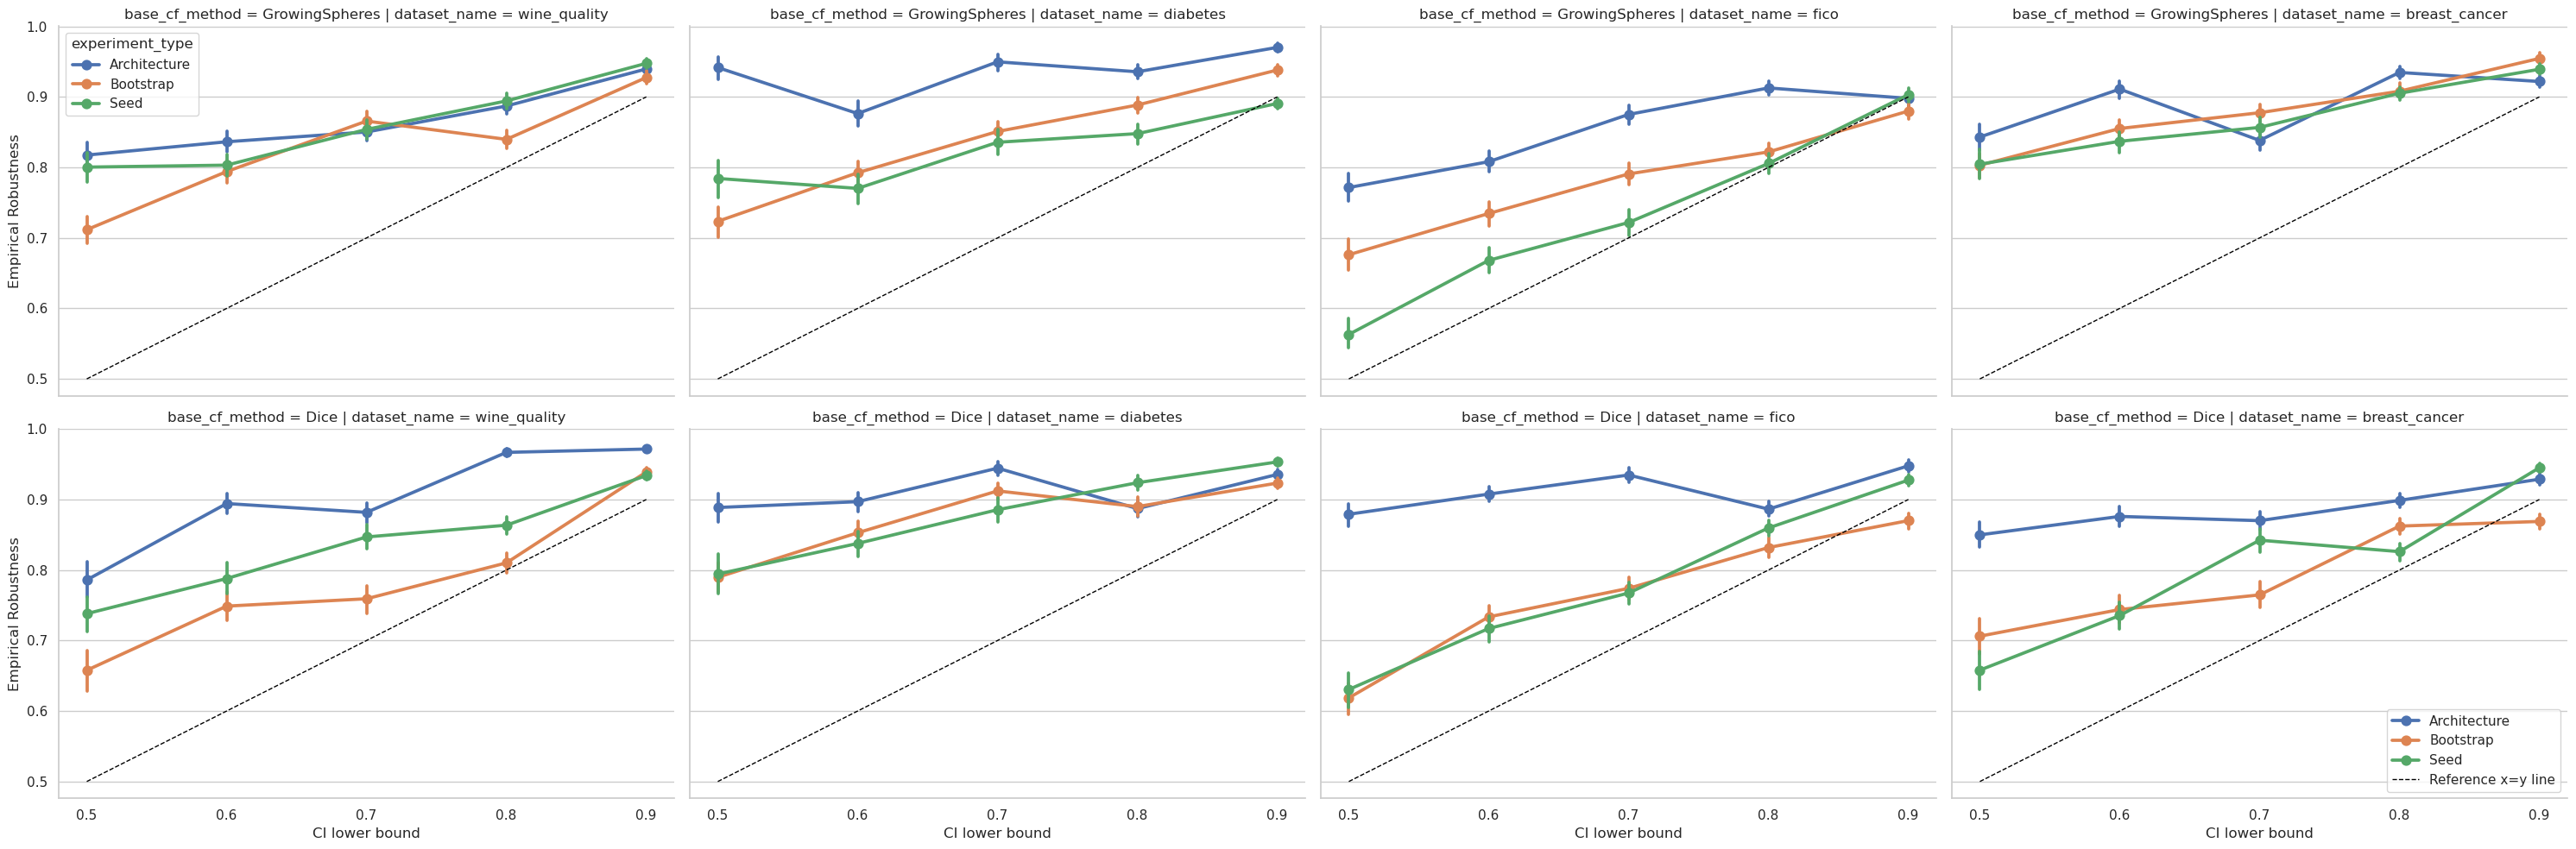

In [11]:
# Split by expeirment type (hue) and dataset (col)
# x-axis: lower bound discretized
# y-axis: average empirical robustness

_tmp_df = nn_df.copy()
lb_threshs = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
_tmp_df['CI lower bound'] = pd.cut(_tmp_df['lower_bound_beta'], bins=lb_threshs, labels=lb_threshs[:-1])
_tmp_df['CI midpoint'] = (_tmp_df['lower_bound_beta'] + _tmp_df['upper_bound_beta']) / 2
_tmp_df['CI midpoint'] = pd.cut(_tmp_df['CI midpoint'], bins=lb_threshs, labels=lb_threshs[:-1])
_tmp_df['Empirical Robustness'] = _tmp_df['robust_counterfactual_validity_model2'].astype(float)

# Print counts for each k_mlps_in_B
print(_tmp_df['k_mlps_in_B'].value_counts())

g = sns.catplot(data=_tmp_df, 
            x='CI lower bound',
            y='Empirical Robustness',
            hue='experiment_type', 
            col='dataset_name', 
            row='base_cf_method',
            kind='point', 
            # palette=colors_discrete, 
            # markers=markers, 
            height=5, 
            aspect=1.5,
            legend_out=False,
)
for ax in g.axes.flat:
    ax.plot(list(range(5)), lb_threshs[:-1], color='black', linestyle='--', linewidth=1, label='Reference x=y line')

plt.legend()
plt.savefig(f'{images_dir}/1_robustness_vs_ci_lower_bound.png', dpi=300, bbox_inches='tight')

<div style="background-color: #AA0000; color: white; text-align: center; font-weight: bold">[2] Is the empirical validity δ-Robust?</div>

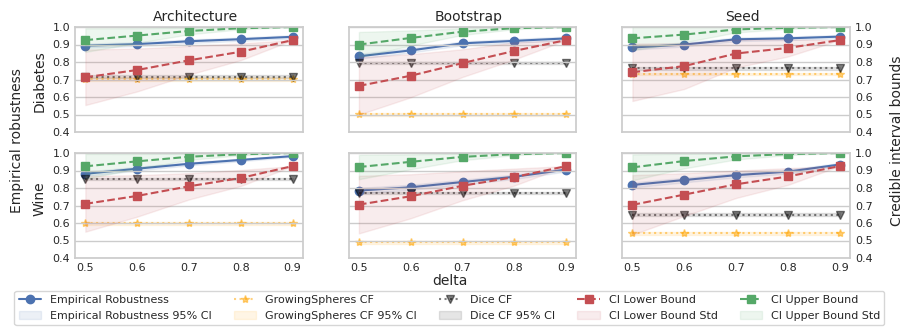

In [12]:
# Use only matplotlib 
# x-axis: delta_robsutness
# y-axis: empirical robustness
# twin y-axis: CI lower and upper bounds
# row: dataset
# col: experiment type

_tmp_df = nn_df.copy()
method='Dice'

# datasets = ['wine_quality', 'diabetes', 'fico', 'breast_cancer']
# rename_Datasets = ['Wine', 'Diabetes', 'Heloc', 'Br. Cancer']

datasets = ['diabetes', 'wine_quality']
rename_Datasets = ['Diabetes', 'Wine']
_tmp_df['dataset_name'] = _tmp_df['dataset_name'].replace(dict(zip(datasets, rename_Datasets)))
datasets = rename_Datasets

experiment_types = _tmp_df['experiment_type'].unique()
delta_robustness = _tmp_df['delta_robustness'].unique().tolist()
delta_robustness.sort()
# Set fontsize to 11
rows = max(2, len(datasets))
cols = max(2, len(experiment_types))
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(10, 3), sharex=True, sharey=True)



for i, dataset in enumerate(datasets):
    for j, experiment_type in enumerate(experiment_types):
        _df_fil = _tmp_df[(_tmp_df['dataset_name'] == dataset) & (_tmp_df['experiment_type'] == experiment_type)]
        _df = _df_fil[_df_fil['base_cf_method'] == method]
        
        data = _df.groupby('delta_robustness')['robust_counterfactual_validity_model2'].mean()
        
        ax = axes[i, j]
        ax.plot(delta_robustness, data, marker='o', linestyle='-', color='b', label='Empirical Robustness')
        emprob_ci = 1.96 * _df.groupby('delta_robustness')['robust_counterfactual_validity_model2'].std() / np.sqrt(_df.groupby('delta_robustness')['robust_counterfactual_validity_model2'].count())
        ax.fill_between(delta_robustness, data - emprob_ci, data + emprob_ci, color='b', alpha=0.1, label='Empirical Robustness 95% CI')
        
        # ax.set_title(f'{dataset} \n{experiment_type}')
        
        
        data_lower = _df.groupby('delta_robustness')['lower_bound_beta'].mean()
        data_upper = _df.groupby('delta_robustness')['upper_bound_beta'].mean()
        
        ax2 = ax.twinx()
        
        ax2.plot(delta_robustness, data_lower, marker='s', linestyle='--', color='r', label='CI Lower Bound')
        # add yerr for lower bound
        lb_std = _df.groupby('delta_robustness')['lower_bound_beta'].std()
        ax2.fill_between(delta_robustness, data_lower - lb_std, data_lower + lb_std, color='r', alpha=0.1, label='CI Lower Bound Std')
        
        ax2.plot(delta_robustness, data_upper, marker='s', linestyle='--', color='g', label='CI Upper Bound')
        # add yerr
        ub_std = _df.groupby('delta_robustness')['upper_bound_beta'].std()
        ax2.fill_between(delta_robustness, data_upper - ub_std, data_upper + ub_std, color='g', alpha=0.1, label='CI Upper Bound Std')
        
        #Plot baseline
        linestyles = [':', ':']
        markers = ['*', 'v', 's']
        for k, (m, color) in enumerate(zip(['GrowingSpheres', 'Dice'], ['orange', 'black'])):
            __df = _df_fil[_df_fil['base_cf_method'] == m]
            base = __df['base_counterfactual_validity_model2'].mean()
            base_std = __df['base_counterfactual_validity_model2'].std()
            base_ci = 1.96 * base_std / np.sqrt(__df['base_counterfactual_validity_model2'].count())
            ax.plot(delta_robustness, [base] * len(delta_robustness), color=color, linestyle=linestyles[k], label=f'{m} CF', marker=markers[k], alpha=0.5)
            ax.fill_between(delta_robustness, base - base_ci, base + base_ci, color=color, alpha=0.1, label=f'{m} CF 95% CI')
        
        l = 0.4
        ax.set_ylim(l, 1)
        ax2.set_ylim(l, 1)
        ax.set_xticks([0.5, 0.6, 0.7, 0.8, 0.9])
        ax.set_yticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
        ax2.set_yticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
            
        # Decrease font size of the labels
        ax.tick_params(axis='both', which='major', labelsize=10)
        ax2.tick_params(axis='both', which='major', labelsize=10)
        
        # Turn off label ticks for ax2 on the plots that are not on the right
        if j != len(experiment_types) - 1:
            ax2.set_yticklabels([])
            
        # Remove the outline of the plot
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        
        
        ax.tick_params(axis=u'both', which=u'both',length=0)
        ax2.tick_params(axis=u'both', which=u'both',length=0)
        
        # Change ticks fontsize
        ax.tick_params(axis='both', which='major', labelsize=8)
        ax2.tick_params(axis='both', which='major', labelsize=8)
        
        # Remove grid
        ax.grid(False)
        
        handles, labels = ax.get_legend_handles_labels()    
        handles_2, labels_2 = ax2.get_legend_handles_labels()
        
        handles_combined = handles + handles_2
        labels_combined = labels + labels_2
        
fig.text(0.5, 0.02, 'delta', ha='center', fontsize=10)
fig.text(0.06, 0.5, 'Empirical robustness', va='center', rotation='vertical', fontsize=10)  
fig.text(0.94, 0.5, 'Credible interval bounds', va='center', rotation='vertical', fontsize=10)
# Create one legend for the entire figure
fig.legend(handles_combined, labels_combined,  bbox_to_anchor=(0.94, 0.02), ncol=5, fontsize=8)

# Set titles for the rows with the dataset names
for ax, row in zip(axes[:,0], datasets):
    rowlen = len(row)
    fig.text(ax.get_position().x0 - 0.035 , ax.get_position().y0 + 0.6 * (1/rowlen), row, ha='center', rotation='vertical', fontsize=10)

# Set titles for the columns
for ax, col in zip(axes[0], experiment_types):
    fig.text(ax.get_position().x0 + 0.12 , ax.get_position().y1 + 0.02, col, ha='center', fontsize=10)

           
plt.savefig(f'{images_dir}/2_empirical_robustness_ci_bounds_paper.png', dpi=300, bbox_inches='tight')

# plt.tight_layout()
plt.show()


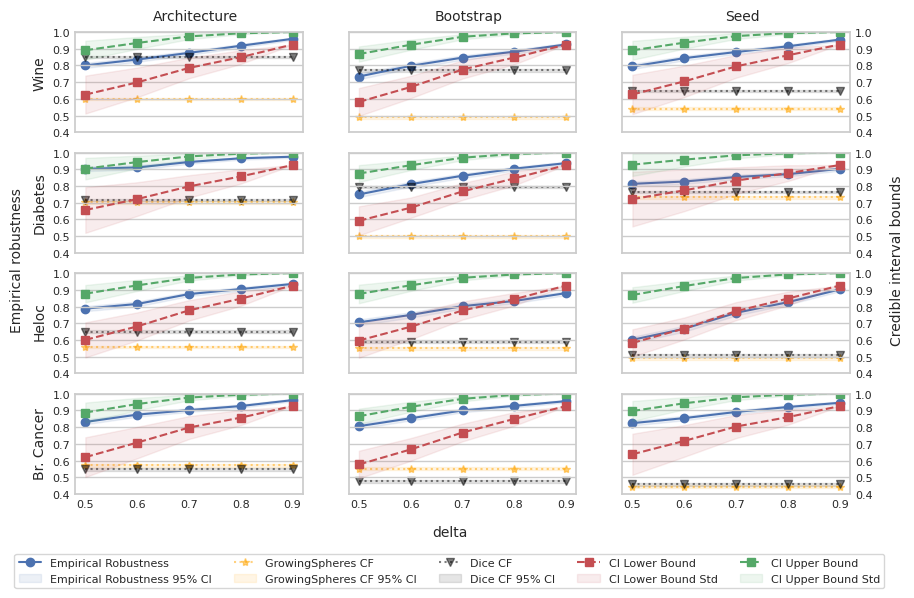

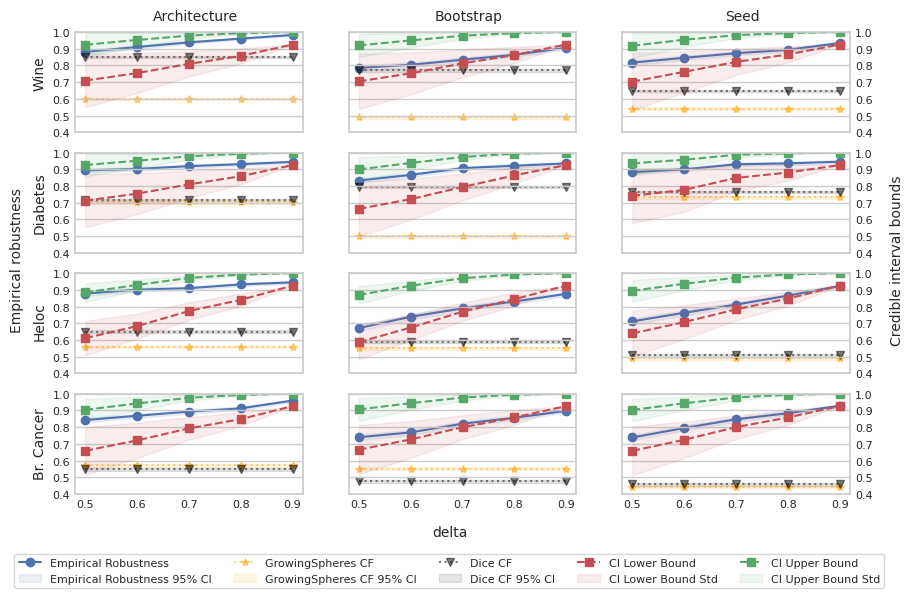

In [13]:
# Use only matplotlib 
# x-axis: delta_robsutness
# y-axis: empirical robustness
# twin y-axis: CI lower and upper bounds
# row: dataset
# col: experiment type

_tmp_df = nn_df.copy()

datasets = ['wine_quality', 'diabetes', 'fico', 'breast_cancer']
rename_Datasets = ['Wine', 'Diabetes', 'Heloc', 'Br. Cancer']

_tmp_df['dataset_name'] = _tmp_df['dataset_name'].replace(dict(zip(datasets, rename_Datasets)))
datasets = rename_Datasets

experiment_types = _tmp_df['experiment_type'].unique()
delta_robustness = _tmp_df['delta_robustness'].unique().tolist()
delta_robustness.sort()
# Set fontsize to 11
rows = max(2, len(datasets))
cols = max(2, len(experiment_types))


for method in ['GrowingSpheres', 'Dice']:
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(10, 6), sharex=True, sharey=True)
    
    for i, dataset in enumerate(datasets):
        for j, experiment_type in enumerate(experiment_types):
            _df_fil = _tmp_df[(_tmp_df['dataset_name'] == dataset) & (_tmp_df['experiment_type'] == experiment_type)]
            _df = _df_fil[_df_fil['base_cf_method'] == method]
            
            data = _df.groupby('delta_robustness')['robust_counterfactual_validity_model2'].mean()
            
            ax = axes[i, j]
            ax.plot(delta_robustness, data, marker='o', linestyle='-', color='b', label='Empirical Robustness')
            emprob_ci = 1.96 * _df.groupby('delta_robustness')['robust_counterfactual_validity_model2'].std() / np.sqrt(_df.groupby('delta_robustness')['robust_counterfactual_validity_model2'].count())
            ax.fill_between(delta_robustness, data - emprob_ci, data + emprob_ci, color='b', alpha=0.1, label='Empirical Robustness 95% CI')
            
            # ax.set_title(f'{dataset} \n{experiment_type}')
            
            
            data_lower = _df.groupby('delta_robustness')['lower_bound_beta'].mean()
            data_upper = _df.groupby('delta_robustness')['upper_bound_beta'].mean()
            
            ax2 = ax.twinx()
            
            ax2.plot(delta_robustness, data_lower, marker='s', linestyle='--', color='r', label='CI Lower Bound')
            # add yerr for lower bound
            lb_std = _df.groupby('delta_robustness')['lower_bound_beta'].std()
            ax2.fill_between(delta_robustness, data_lower - lb_std, data_lower + lb_std, color='r', alpha=0.1, label='CI Lower Bound Std')
            
            ax2.plot(delta_robustness, data_upper, marker='s', linestyle='--', color='g', label='CI Upper Bound')
            # add yerr
            ub_std = _df.groupby('delta_robustness')['upper_bound_beta'].std()
            ax2.fill_between(delta_robustness, data_upper - ub_std, data_upper + ub_std, color='g', alpha=0.1, label='CI Upper Bound Std')
            
            #Plot baseline
            linestyles = [':', ':']
            markers = ['*', 'v', 's']
            for k, (m, color) in enumerate(zip(['GrowingSpheres', 'Dice'], ['orange', 'black'])):
                __df = _df_fil[_df_fil['base_cf_method'] == m]
                base = __df['base_counterfactual_validity_model2'].mean()
                base_std = __df['base_counterfactual_validity_model2'].std()
                base_ci = 1.96 * base_std / np.sqrt(__df['base_counterfactual_validity_model2'].count())
                ax.plot(delta_robustness, [base] * len(delta_robustness), color=color, linestyle=linestyles[k], label=f'{m} CF', marker=markers[k], alpha=0.5)
                ax.fill_between(delta_robustness, base - base_ci, base + base_ci, color=color, alpha=0.1, label=f'{m} CF 95% CI')
            
            l = 0.4
            ax.set_ylim(l, 1)
            ax2.set_ylim(l, 1)
            ax.set_xticks([0.5, 0.6, 0.7, 0.8, 0.9])
            ax.set_yticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
            ax2.set_yticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
                
            # Decrease font size of the labels
            ax.tick_params(axis='both', which='major', labelsize=10)
            ax2.tick_params(axis='both', which='major', labelsize=10)
            
            # Turn off label ticks for ax2 on the plots that are not on the right
            if j != len(experiment_types) - 1:
                ax2.set_yticklabels([])
                
            # Remove the outline of the plot
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['left'].set_visible(False)
            ax.spines['bottom'].set_visible(False)
            
            
            ax.tick_params(axis=u'both', which=u'both',length=0)
            ax2.tick_params(axis=u'both', which=u'both',length=0)
            
            # Change ticks fontsize
            ax.tick_params(axis='both', which='major', labelsize=8)
            ax2.tick_params(axis='both', which='major', labelsize=8)
            
            # Remove grid
            ax.grid(False)
            
            handles, labels = ax.get_legend_handles_labels()    
            handles_2, labels_2 = ax2.get_legend_handles_labels()
            
            handles_combined = handles + handles_2
            labels_combined = labels + labels_2
            
    fig.text(0.5, 0.04, 'delta', ha='center', fontsize=10)
    fig.text(0.06, 0.5, 'Empirical robustness', va='center', rotation='vertical', fontsize=10)  
    fig.text(0.94, 0.5, 'Credible interval bounds', va='center', rotation='vertical', fontsize=10)
    # Create one legend for the entire figure
    fig.legend(handles_combined, labels_combined,  bbox_to_anchor=(0.94, 0.02), ncol=5, fontsize=8)

    # Set titles for the rows with the dataset names
    for ax, row in zip(axes[:,0], datasets):
        rowlen = len(row)
        fig.text(ax.get_position().x0 - 0.035 , ax.get_position().y0 + 0.3 * (1/rowlen), row, ha='center', rotation='vertical', fontsize=10)

    # Set titles for the columns
    for ax, col in zip(axes[0], experiment_types):
        fig.text(ax.get_position().x0 + 0.12 , ax.get_position().y1 + 0.02, col, ha='center', fontsize=10)

            
    plt.savefig(f'{images_dir}/2_empirical_robustness_ci_bounds_{method}.png', dpi=300, bbox_inches='tight')

    # plt.tight_layout()
    plt.show()
    plt.close()
  

<div style="background-color: #AA0000; color: white; text-align: center; font-weight: bold">[3] Comparision to RobX</div>

In [14]:
robx_results_path = results_path + '/robx'
robx_raw_df = process_results(robx_results_path)

Reading results: 100%|██████████| 9/9 [00:10<00:00,  1.14s/it]


In [15]:
robx_raw_df.head(3)

,base_cf_method,model_type_to_use,experiment_type,dataset_name,k_mlps_in_B,fold_i,experiment_generalization_type,beta_confidence,delta_robustness,model2_name,x_test_sample,y_test_sample,model1_pred_proba,model1_pred_crisp,model2_pred_proba,model2_pred_crisp,base_counterfactual,base_counterfactual_model1_pred_proba,base_counterfactual_model1_pred_crisp,base_counterfactual_model2_pred_proba,base_counterfactual_model2_pred_crisp,base_counterfactual_validity,base_counterfactual_proximityL1,base_counterfactual_proximityL2,base_counterfactual_plausibility,base_counterfactual_discriminative_power,base_counterfactual_validity_model2,base_counterfactual_time,robust_counterfactual,robust_counterfactual_model1_pred_proba,robust_counterfactual_model1_pred_crisp,robust_counterfactual_model2_pred_proba,robust_counterfactual_model2_pred_crisp,robust_counterfactual_validity,robust_counterfactual_proximityL1,robust_counterfactual_proximityL2,robust_counterfactual_plausibility,robust_counterfactual_discriminative_power,robust_counterfactual_validity_model2,robust_counterfactual_L1_distance_from_base_cf,robust_counterfactual_L2_distance_from_base_cf,robust_counterfactual_time,base_model
0,GrowingSpheres,neural_network,Architecture,diabetes,32,1,Architecture,0.7,0.01,Model2_11,"[0.7857142857142857, 0.696969696969697, 0.6666...",0,0.734939,1,0.724627,1,"[0.8103538767393335, 0.6053736527111419, 0.637...",0.470371,0,0.449613,0,1,0.409785,0.158838,0.269307,0.533333,1,0.002746,"[0.6773432350183033, 0.4134079277534613, 0.674...",0.119903,0.0,0.118728,0.0,1.0,0.768407,0.381826,0.258264,0.733333,1.0,0.594942,0.07924,0.142122,NeuralNetwork
1,GrowingSpheres,neural_network,Architecture,diabetes,32,1,Architecture,0.7,0.01,Model2_12,"[0.7857142857142857, 0.696969696969697, 0.6666...",0,0.734939,1,0.652201,1,"[0.8103538767393335, 0.6053736527111419, 0.637...",0.470371,0,0.449613,0,1,0.409785,0.158838,0.269307,0.533333,1,0.002746,"[0.6773432350183033, 0.4134079277534613, 0.674...",0.119903,0.0,0.126338,0.0,1.0,0.768407,0.381826,0.258264,0.733333,1.0,0.594942,0.07924,0.141538,NeuralNetwork
2,GrowingSpheres,neural_network,Architecture,diabetes,32,1,Architecture,0.7,0.01,Model2_13,"[0.7857142857142857, 0.696969696969697, 0.6666...",0,0.734939,1,0.785541,1,"[0.8103538767393335, 0.6053736527111419, 0.637...",0.470371,0,0.449613,0,1,0.409785,0.158838,0.269307,0.533333,1,0.002746,"[0.6773432350183033, 0.4134079277534613, 0.674...",0.119903,0.0,0.145830,0.0,1.0,0.768407,0.381826,0.258264,0.733333,1.0,0.594942,0.07924,0.141938,NeuralNetwork


In [16]:
robx_raw_df.rename(columns={'beta_confidence': 'tau', 'delta_robustness': 'variance'}, inplace=True)

In [17]:
robx_nn_gs_df = robx_raw_df[(robx_raw_df['base_model'] == 'NeuralNetwork') & (robx_raw_df['base_cf_method'] == 'GrowingSpheres')]
robx_nn_dice_df = robx_raw_df[(robx_raw_df['base_model'] == 'NeuralNetwork') & (robx_raw_df['base_cf_method'] == 'Dice')]
robx_nn_df = robx_raw_df[robx_raw_df['base_model'] == 'NeuralNetwork']
robx_dt_gs_df = robx_raw_df[(robx_raw_df['base_model'] == 'DecisionTree') & (robx_raw_df['base_cf_method'] == 'GrowingSpheres')]
robx_dt_dice_df = robx_raw_df[(robx_raw_df['base_model'] == 'DecisionTree') & (robx_raw_df['base_cf_method'] == 'Dice')]
robx_dt_df = robx_raw_df[robx_raw_df['base_model'] == 'DecisionTree']

print(f'Lengths of the dataframes: NN GS: {len(robx_nn_gs_df)}, NN Dice: {len(robx_nn_dice_df)}, DT GS: {len(robx_dt_gs_df)}, DT Dice: {len(robx_dt_dice_df)}')

Lengths of the dataframes: NN GS: 258804, NN Dice: 0, DT GS: 0, DT Dice: 0


In [18]:
_robx_df = robx_nn_gs_df.copy().dropna()
_betarob_df = nn_gs_df.copy().dropna()
_method_df = nn_df.copy().dropna()

columns_to_keep = [
    'dataset_name',
    'experiment_type',
    'method_name',
    'robust_counterfactual_validity_model2',
    'robust_counterfactual_L1_distance_from_base_cf',
    'robust_counterfactual_proximityL1',
    'robust_counterfactual_plausibility',
    'robust_counterfactual_discriminative_power',
    'robust_counterfactual_time'
]

rename_names = [
    'Dataset',
    'Experiment Type',
    'Method',
    'Empirical Robustness',
    'Distance to Base',
    'Proximity L1',
    'Plausibility',
    'Discriminative Power',
    'Time (s)'

]

# Process the dataframes
_robx_df['method_name'] = 'RobX' + '(' + _robx_df['tau'].astype(str) + ',' + _robx_df['variance'].astype(str) + ')'
_robx_df = _robx_df[columns_to_keep].rename(columns=dict(zip(columns_to_keep, rename_names)))

_betarob_df['method_name'] = 'BetaRCE' + '(' + _betarob_df['delta_robustness'].astype(str) + ',' + _betarob_df['beta_confidence'].astype(str) + ')'
_betarob_df = _betarob_df[columns_to_keep].rename(columns=dict(zip(columns_to_keep, rename_names)))

_method_df['method_name'] = _method_df['base_cf_method']
_method_df = _method_df[columns_to_keep].rename(columns=dict(zip(columns_to_keep, rename_names)))
                                            
datasets = _robx_df['Dataset'].unique()
experiment_types = _robx_df['Experiment Type'].unique()

In [19]:
metrics = [
    'Distance to Base', 
    'Proximity L1', 
    'Plausibility', 
    'Discriminative Power', 
    'Time (s)'
]

groupby = ['Dataset', 'Experiment Type', 'Method']
groupby_metrics = ['Dataset', 'Method']
keep_robx = ['RobX(0.5,0.01)', 'RobX(0.5,0.1)', 'RobX(0.6,0.01)', 'RobX(0.6,0.1)']
baselines = ['GrowingSpheres', 'Dice']
keepRCE = ['BetaRCE(0.6,0.95)', 'BetaRCE(0.7,0.95)', 'BetaRCE(0.8,0.95)', 'BetaRCE(0.9,0.95)']


# -- ROBX --
robx_grouped = _robx_df.groupby(groupby).mean(numeric_only=False)
robx_grouped = robx_grouped[robx_grouped.index.get_level_values('Method').isin(keep_robx)]
# Empirical
robx_grouped_emp = robx_grouped.unstack(level=-2)['Empirical Robustness']
# Metrics
robx_grouped_method = robx_grouped.groupby(groupby_metrics)[metrics].mean(numeric_only=False)
robx_grouped_method['Experiment Type'] = ['-'] * len(robx_grouped_method) 
robx_grouped_method = robx_grouped_method.set_index(['Experiment Type'], append=True)
robx_grouped_method = robx_grouped_method.reorder_levels([0,2,1])


# -- Baselines --
method_grouped = _method_df.groupby(groupby)
method_grouped = method_grouped.mean(numeric_only=False)
method_grouped = method_grouped[method_grouped.index.get_level_values('Method').isin(baselines)]
# Empirical
method_grouped_emp = method_grouped.unstack(level=-2)['Empirical Robustness']
# Metrics
method_grouped_method = method_grouped.groupby(groupby_metrics)[metrics].mean(numeric_only=False)
method_grouped_method['Experiment Type'] = ['-'] * len(method_grouped_method) 
method_grouped_method = method_grouped_method.set_index(['Experiment Type'], append=True)
method_grouped_method = method_grouped_method.reorder_levels([0,2,1])

# -- RCE -- 
rce_grouped = _betarob_df.groupby(groupby)
rce_grouped = rce_grouped.mean(numeric_only=False)
rce_grouped = rce_grouped[rce_grouped.index.get_level_values('Method').isin(keepRCE)]
# Empirical
rce_grouped_emp = rce_grouped.unstack(level=-2)['Empirical Robustness']
# Metrics 
rce_grouped_method = rce_grouped[metrics]
rce_grouped_method = rce_grouped_method.loc[(slice(None), slice(None), keepRCE), :]


# CONCAT
all_emp = pd.concat([method_grouped_emp, robx_grouped_emp, rce_grouped_emp]).sort_index(level=0, sort_remaining=False)
all_emp.to_csv(f'{images_dir}/all_emp.csv')
met_emp = pd.concat([method_grouped_method, robx_grouped_method, rce_grouped_method]).sort_index(level=0)
met_emp.to_csv(f'{images_dir}/all_met.csv')

In [20]:
all_emp

Experiment Type                  Architecture  Bootstrap      Seed
Dataset       Method                                              
breast_cancer Dice                   0.893963   0.815704  0.837556
              GrowingSpheres         0.898067   0.885824  0.886222
              RobX(0.5,0.01)         0.847778   0.957037  0.845556
              RobX(0.5,0.1)          0.997407   0.999630  0.995926
              RobX(0.6,0.01)         0.914074   0.982963  0.921481
              RobX(0.6,0.1)          1.000000   1.000000  0.999630
              BetaRCE(0.6,0.95)      0.874074   0.852593  0.853333
              BetaRCE(0.7,0.95)      0.901152   0.899259  0.890000
              BetaRCE(0.8,0.95)      0.925424   0.926465  0.919630
              BetaRCE(0.9,0.95)      0.960829   0.954747  0.944815
diabetes      Dice                   0.916473   0.889130  0.916188
              GrowingSpheres         0.939444   0.852370  0.853259
              RobX(0.5,0.01)         0.969630   0.872222  0.922222
              RobX(0.5,0.1)          0.998152   0.946667  0.969444
              RobX(0.6,0.01)         0.975926   0.935926  0.957407
              RobX(0.6,0.1)          1.000000   0.947816  0.976582
              BetaRCE(0.6,0.95)      0.910556   0.811111  0.826667
              BetaRCE(0.7,0.95)      0.943333   0.861111  0.853704
              BetaRCE(0.8,0.95)      0.965556   0.903333  0.870741
              BetaRCE(0.9,0.95)      0.975000   0.936667  0.902222
fico          Dice                   0.911909   0.780694  0.814593
              GrowingSpheres         0.862359   0.793958  0.751630
              RobX(0.5,0.01)         0.939259   0.814444  0.890370
              RobX(0.5,0.1)          0.990698   0.957407  0.954883
              RobX(0.6,0.01)         0.997407   0.946296  0.988889
              RobX(0.6,0.1)          0.998745   0.977018  0.992271
              BetaRCE(0.6,0.95)      0.815185   0.749630  0.667037
              BetaRCE(0.7,0.95)      0.874303   0.802222  0.762222
              BetaRCE(0.8,0.95)      0.904312   0.832963  0.825926
              BetaRCE(0.9,0.95)      0.934808   0.880284  0.901852
wine_quality  Dice                   0.934259   0.838593  0.872741
              GrowingSpheres         0.877248   0.837407  0.877407
              RobX(0.5,0.01)         1.000000   0.979259  0.996667
              RobX(0.5,0.1)          1.000000   0.969565  1.000000
              RobX(0.6,0.01)         1.000000   0.987407  0.998148
              RobX(0.6,0.1)          1.000000   0.753208  0.996296
              BetaRCE(0.6,0.95)      0.835556   0.797778  0.843704
              BetaRCE(0.7,0.95)      0.875139   0.847037  0.880370
              BetaRCE(0.8,0.95)      0.917891   0.882222  0.914444
              BetaRCE(0.9,0.95)      0.959322   0.925926  0.954444

In [21]:
met_emp.head(20)

Distance to Base  \
Dataset       Experiment Type Method                                
breast_cancer -               Dice                       1.241211   
                              GrowingSpheres             1.442959   
                              RobX(0.5,0.01)             1.250728   
                              RobX(0.5,0.1)              3.163251   
                              RobX(0.6,0.01)             1.737281   
                              RobX(0.6,0.1)              3.724724   
              Architecture    BetaRCE(0.6,0.95)          1.256109   
                              BetaRCE(0.7,0.95)          1.478946   
                              BetaRCE(0.8,0.95)          1.683875   
                              BetaRCE(0.9,0.95)          2.057877   
              Bootstrap       BetaRCE(0.6,0.95)          0.844552   
                              BetaRCE(0.7,0.95)          1.180492   
                              BetaRCE(0.8,0.95)          1.527701   
                              BetaRCE(0.9,0.95)          1.964628   
              Seed            BetaRCE(0.6,0.95)          1.393524   
                              BetaRCE(0.7,0.95)          1.593998   
                              BetaRCE(0.8,0.95)          1.749085   
                              BetaRCE(0.9,0.95)          2.115189   
diabetes      -               Dice                       0.296781   
                              GrowingSpheres             0.337519   

                                                 Proximity L1  Plausibility  \
Dataset       Experiment Type Method                                          
breast_cancer -               Dice                   3.004467      1.113259   
                              GrowingSpheres         3.810998      0.949247   
                              RobX(0.5,0.01)         3.135431      0.727932   
                              RobX(0.5,0.1)          3.956242      0.562513   
                              RobX(0.6,0.01)         3.170702      0.667127   
                              RobX(0.6,0.1)          4.362448      0.520003   
              Architecture    BetaRCE(0.6,0.95)      3.844327      0.936397   
                              BetaRCE(0.7,0.95)      3.968741      0.952244   
                              BetaRCE(0.8,0.95)      4.108080      0.969421   
                              BetaRCE(0.9,0.95)      4.324128      0.996001   
              Bootstrap       BetaRCE(0.6,0.95)      3.507370      0.930454   
                              BetaRCE(0.7,0.95)      3.668676      0.949541   
                              BetaRCE(0.8,0.95)      3.937120      0.995570   
                              BetaRCE(0.9,0.95)      4.175585      1.024027   
              Seed            BetaRCE(0.6,0.95)      3.579992      0.913895   
                              BetaRCE(0.7,0.95)      3.691824      0.928510   
                              BetaRCE(0.8,0.95)      3.787762      0.940167   
                              BetaRCE(0.9,0.95)      3.999528      0.967216   
diabetes      -               Dice                   1.002200      0.498862   
                              GrowingSpheres         0.799509      0.358161   

                                                 Discriminative Power  \
Dataset       Experiment Type Method                                    
breast_cancer -               Dice                           0.419248   
                              GrowingSpheres                 0.345158   
                              RobX(0.5,0.01)                 0.434099   
                              RobX(0.5,0.1)                  0.821613   
                              RobX(0.6,0.01)                 0.531119   
                              RobX(0.6,0.1)                  0.911941   
              Architecture    BetaRCE(0.6,0.95)              0.352025   
                              BetaRCE(0.7,0.95)              0.379562   
                              BetaRCE(0.8,0.95)              

In [22]:
metrics = [
    'Distance to Base', 
    'Proximity L1', 
    'Plausibility', 
    'Discriminative Power', 
    'Time (s)'
]

groupby = ['Dataset', 'Experiment Type', 'Method']
groupby_metrics = ['Dataset', 'Method']
keep_robx = ['RobX(0.5,0.01)', 'RobX(0.5,0.1)', 'RobX(0.6,0.01)', 'RobX(0.6,0.1)']
baselines = ['GrowingSpheres', 'Dice']
keepRCE = ['BetaRCE(0.6,0.95)', 'BetaRCE(0.7,0.95)', 'BetaRCE(0.8,0.95)', 'BetaRCE(0.9,0.95)']


# -- ROBX --
robx_grouped = _robx_df.groupby(groupby)
robx_grouped = robx_grouped.std(numeric_only=False) / np.sqrt(robx_grouped.count())
robx_grouped = robx_grouped[robx_grouped.index.get_level_values('Method').isin(keep_robx)]
# Empirical
robx_grouped_emp = robx_grouped.unstack(level=-2)['Empirical Robustness']
# Metrics
robx_grouped_method = robx_grouped.groupby(groupby_metrics)[metrics]
robx_grouped_method = robx_grouped_method.std(numeric_only=False) / np.sqrt(robx_grouped_method.count())
robx_grouped_method['Experiment Type'] = ['-'] * len(robx_grouped_method) 
robx_grouped_method = robx_grouped_method.set_index(['Experiment Type'], append=True)
robx_grouped_method = robx_grouped_method.reorder_levels([0,2,1])


# -- Baselines --
method_grouped = _method_df.groupby(groupby)
method_grouped = method_grouped.std(numeric_only=False) / np.sqrt(method_grouped.count())
method_grouped = method_grouped[method_grouped.index.get_level_values('Method').isin(baselines)]
# Empirical
method_grouped_emp = method_grouped.unstack(level=-2)['Empirical Robustness']
# Metrics
method_grouped_method = method_grouped.groupby(groupby_metrics)[metrics]
method_grouped_method = method_grouped_method.std(numeric_only=False) / np.sqrt(method_grouped_method.count())
method_grouped_method['Experiment Type'] = ['-'] * len(method_grouped_method) 
method_grouped_method = method_grouped_method.set_index(['Experiment Type'], append=True)
method_grouped_method = method_grouped_method.reorder_levels([0,2,1])

# -- RCE -- 
rce_grouped = _betarob_df.groupby(groupby)
rce_grouped = rce_grouped.std(numeric_only=False) / np.sqrt(rce_grouped.count())
rce_grouped = rce_grouped[rce_grouped.index.get_level_values('Method').isin(keepRCE)]
# Empirical
rce_grouped_emp = rce_grouped.unstack(level=-2)['Empirical Robustness']
# Metrics 
rce_grouped_method = rce_grouped[metrics]
rce_grouped_method = rce_grouped_method.loc[(slice(None), slice(None), keepRCE), :]


# CONCAT
all_emp_std = pd.concat([method_grouped_emp, robx_grouped_emp, rce_grouped_emp]).sort_index(level=0, sort_remaining=False)
all_emp_std.to_csv(f'{images_dir}/all_emp_std.csv')
met_emp_std = pd.concat([method_grouped_method, robx_grouped_method, rce_grouped_method]).sort_index(level=0)
met_emp_std.to_csv(f'{images_dir}/all_met_std.csv')

In [23]:
all_comprehensive = all_emp.round(3).astype(str) + ' +- ' + all_emp_std.round(3).astype(str) 
all_comprehensive.to_csv(f'{images_dir}/all_with_se.csv')
all_comprehensive

Experiment Type                    Architecture       Bootstrap  \
Dataset       Method                                              
breast_cancer Dice               0.894 +- 0.003  0.816 +- 0.003   
              GrowingSpheres     0.898 +- 0.003  0.886 +- 0.003   
              RobX(0.5,0.01)     0.848 +- 0.007  0.957 +- 0.004   
              RobX(0.5,0.1)      0.997 +- 0.001      1.0 +- 0.0   
              RobX(0.6,0.01)     0.914 +- 0.005  0.983 +- 0.002   
              RobX(0.6,0.1)          1.0 +- 0.0      1.0 +- 0.0   
              BetaRCE(0.6,0.95)  0.874 +- 0.006  0.853 +- 0.007   
              BetaRCE(0.7,0.95)  0.901 +- 0.006  0.899 +- 0.006   
              BetaRCE(0.8,0.95)  0.925 +- 0.005  0.926 +- 0.005   
              BetaRCE(0.9,0.95)  0.961 +- 0.004  0.955 +- 0.004   
diabetes      Dice               0.916 +- 0.002  0.889 +- 0.003   
              GrowingSpheres     0.939 +- 0.003  0.852 +- 0.003   
              RobX(0.5,0.01)      0.97 +- 0.003  0.872 +- 0.006   
              RobX(0.5,0.1)      0.998 +- 0.001  0.947 +- 0.004   
              RobX(0.6,0.01)     0.976 +- 0.003  0.936 +- 0.005   
              RobX(0.6,0.1)          1.0 +- 0.0  0.948 +- 0.004   
              BetaRCE(0.6,0.95)  0.911 +- 0.007  0.811 +- 0.008   
              BetaRCE(0.7,0.95)  0.943 +- 0.005  0.861 +- 0.007   
              BetaRCE(0.8,0.95)  0.966 +- 0.004  0.903 +- 0.006   
              BetaRCE(0.9,0.95)  0.975 +- 0.004  0.937 +- 0.005   
fico          Dice               0.912 +- 0.002  0.781 +- 0.004   
              GrowingSpheres     0.862 +- 0.003  0.794 +- 0.003   
              RobX(0.5,0.01)     0.939 +- 0.005  0.814 +- 0.007   
              RobX(0.5,0.1)      0.991 +- 0.002  0.957 +- 0.004   
              RobX(0.6,0.01)     0.997 +- 0.001  0.946 +- 0.004   
              RobX(0.6,0.1)      0.999 +- 0.001  0.977 +- 0.003   
              BetaRCE(0.6,0.95)  0.815 +- 0.007   0.75 +- 0.008   
              BetaRCE(0.7,0.95)  0.874 +- 0.006  0.802 +- 0.008   
              BetaRCE(0.8,0.95)  0.904 +- 0.006  0.833 +- 0.007   
              BetaRCE(0.9,0.95)  0.935 +- 0.005   0.88 +- 0.006   
wine_quality  Dice               0.934 +- 0.002  0.839 +- 0.003   
              GrowingSpheres     0.877 +- 0.003  0.837 +- 0.003   
              RobX(0.5,0.01)         1.0 +- 0.0  0.979 +- 0.003   
              RobX(0.5,0.1)          1.0 +- 0.0   0.97 +- 0.004   
              RobX(0.6,0.01)         1.0 +- 0.0  0.987 +- 0.002   
              RobX(0.6,0.1)          1.0 +- 0.0  0.753 +- 0.014   
              BetaRCE(0.6,0.95)  0.836 +- 0.007  0.798 +- 0.008   
              BetaRCE(0.7,0.95)  0.875 +- 0.006  0.847 +- 0.007   
              BetaRCE(0.8,0.95)  0.918 +- 0.005  0.882 +- 0.006   
              BetaRCE(0.9,0.95)  0.959 +- 0.004  0.926 +- 0.005   

Experiment Type                            Seed  
Dataset       Method                             
breast_cancer Dice               0.838 +- 0.003  
              GrowingSpheres     0.886 +- 0.003  
              RobX(0.5,0.01)     0.846 +- 0.007  
              RobX(0.5,0.1)      0.996 +- 0.001  
              RobX(0.6,0.01)     0.921 +- 0.005  
              RobX(0.6,0.1)          1.0 +- 0.0  
              BetaRCE(0.6,0.95)  0.853 +- 0.007  
              BetaRCE(0.7,0.95)   0.89 +- 0.006  
              BetaRCE(0.8,0.95)   0.92 +- 0.005  
              BetaRCE(0.9,0.95)  0.945 +- 0.004  
diabetes      Dice               0.916 +- 0.003  
              GrowingSpheres     0.853 +- 0.003  
              RobX(0.5,0.01)     0.922 +- 0.005  
              RobX(0.5,0.1)      0.969 +- 0.004  
              RobX(0.6,0.01)     0.957 +- 0.004  
              RobX(0.6,0.1)      0.977 +- 0.004  
              BetaRCE(0.6,0.95)  0.827 +- 0.007  
              BetaRCE(0.7,0.95)  0.854 +- 0.007  
              BetaRCE(0.8,0.95)  0.871 +- 0.006  
              BetaRCE(0.9,0.95)  0.902 +- 0.006  
fico          Dice               0.815 +- 0.003  
              GrowingSpheres     0.

In [24]:
all_metrics_comprehensive = met_emp.round(3).astype(str) + ' +- ' + met_emp_std.round(3).astype(str) 
all_metrics_comprehensive.to_csv(f'{images_dir}/all_metrics_with_se.csv')
all_metrics_comprehensive.head(50)

Distance to Base  \
Dataset       Experiment Type Method                               
breast_cancer -               Dice                1.241 +- 0.004   
                              GrowingSpheres      1.443 +- 0.001   
                              RobX(0.5,0.01)      1.251 +- 0.001   
                              RobX(0.5,0.1)       3.163 +- 0.001   
                              RobX(0.6,0.01)      1.737 +- 0.002   
                              RobX(0.6,0.1)       3.725 +- 0.001   
              Architecture    BetaRCE(0.6,0.95)   1.256 +- 0.023   
                              BetaRCE(0.7,0.95)   1.479 +- 0.024   
                              BetaRCE(0.8,0.95)   1.684 +- 0.026   
                              BetaRCE(0.9,0.95)   2.058 +- 0.028   
              Bootstrap       BetaRCE(0.6,0.95)   0.845 +- 0.017   
                              BetaRCE(0.7,0.95)     1.18 +- 0.02   
                              BetaRCE(0.8,0.95)   1.528 +- 0.024   
                              BetaRCE(0.9,0.95)   1.965 +- 0.026   
              Seed            BetaRCE(0.6,0.95)   1.394 +- 0.024   
                              BetaRCE(0.7,0.95)   1.594 +- 0.026   
                              BetaRCE(0.8,0.95)   1.749 +- 0.028   
                              BetaRCE(0.9,0.95)   2.115 +- 0.032   
diabetes      -               Dice                  0.297 +- 0.0   
                              GrowingSpheres      0.338 +- 0.001   
                              RobX(0.5,0.01)        0.429 +- 0.0   
                              RobX(0.5,0.1)       1.224 +- 0.001   
                              RobX(0.6,0.01)       0.59 +- 0.001   
                              RobX(0.6,0.1)       1.629 +- 0.002   
              Architecture    BetaRCE(0.6,0.95)   0.354 +- 0.011   
                              BetaRCE(0.7,0.95)   0.423 +- 0.012   
                              BetaRCE(0.8,0.95)   0.488 +- 0.013   
                              BetaRCE(0.9,0.95)   0.607 +- 0.014   
              Bootstrap       BetaRCE(0.6,0.95)   0.228 +- 0.004   
                              BetaRCE(0.7,0.95)   0.346 +- 0.006   
                              BetaRCE(0.8,0.95)   0.445 +- 0.006   
                              BetaRCE(0.9,0.95)   0.583 +- 0.007   
              Seed            BetaRCE(0.6,0.95)   0.184 +- 0.005   
                              BetaRCE(0.7,0.95)   0.216 +- 0.005   
                              BetaRCE(0.8,0.95)   0.247 +- 0.006   
                              BetaRCE(0.9,0.95)   0.315 +- 0.006   
fico          -               Dice                1.994 +- 0.004   
                              GrowingSpheres      1.471 +- 0.003   
                              RobX(0.5,0.01)      1.145 +- 0.002   
                              RobX(0.5,0.1)       3.548 +- 0.005   
                              RobX(0.6,0.01)      1.875 +- 0.001   
                              RobX(0.6,0.1)       3.907 +- 0.004   
              Architecture    BetaRCE(0.6,0.95)   0.899 +- 0.027   
                              BetaRCE(0.7,0.95)   1.242 +- 0.042   
                              BetaRCE(0.8,0.95)   1.538 +- 0.049   
                              BetaRCE(0.9,0.95)   1.697 +- 0.031   
              Bootstrap       BetaRCE(0.6,0.95)   1.343 +- 0.027   
                              BetaRCE(0.7,0.95)    1.82 +- 0.033   
                              BetaRCE(0.8,0.95)   2.288 +- 0.041   
                              BetaRCE(0.9,0.95)   3.547 +- 0.071   

                                                   Proximity L1  \
Dataset       Experiment Type Method                              
breast_cancer -               Dice               3.004 +- 0.003   
                              GrowingSpheres       3.811 +- 0.0   
                              RobX(0.5,0.01)     3.135 +- 0.001   
                              RobX(0.5,0.1)      3.956 +- 0.001   
                              RobX(0.6,0.01)     3.171 +- 0.001   
                              RobX(0.6,0.1

Histograms with distance

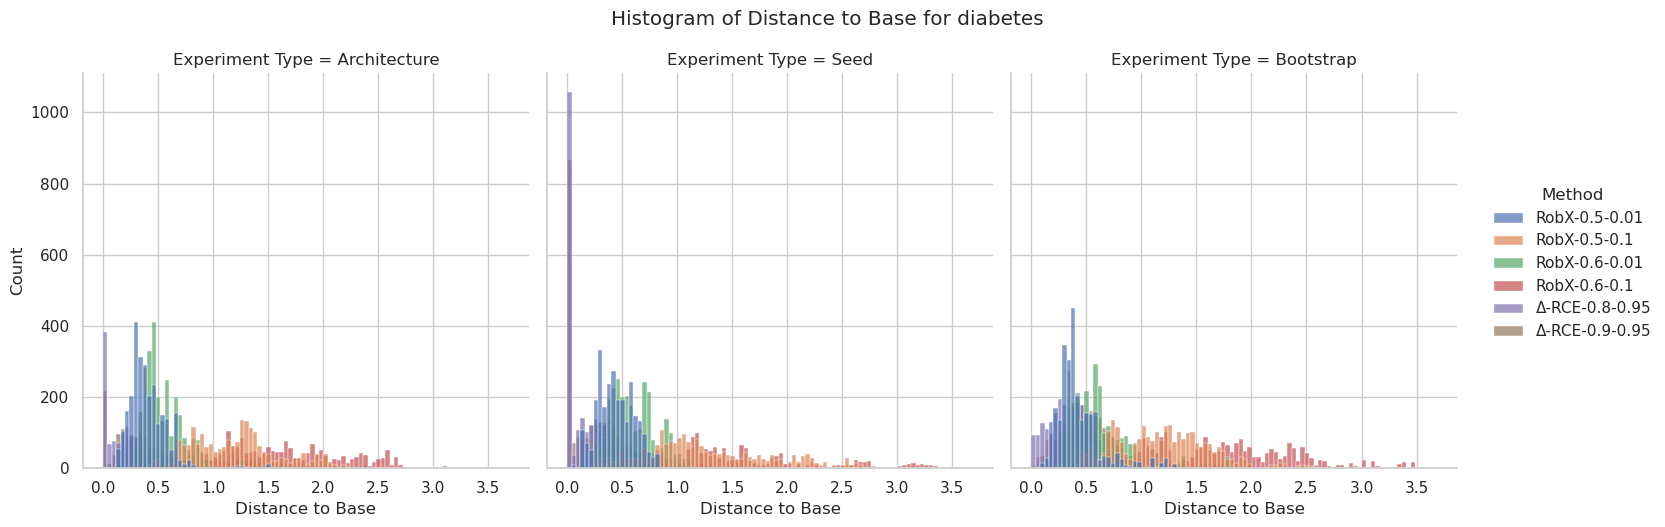

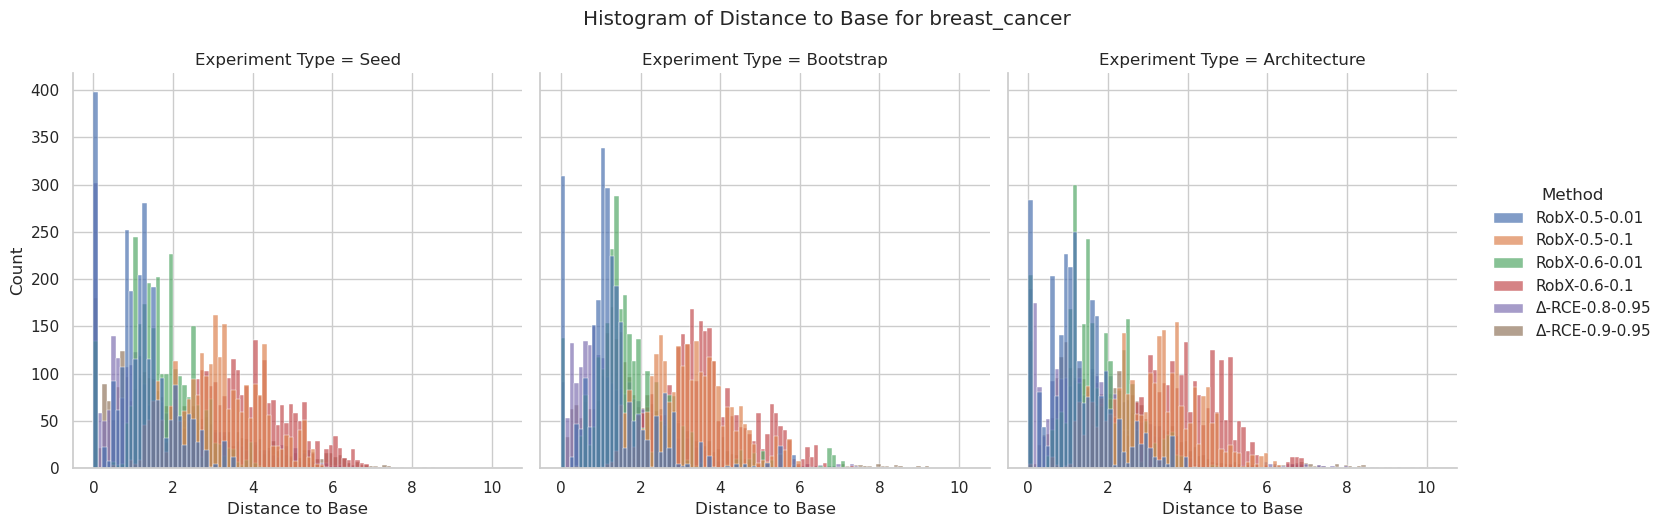

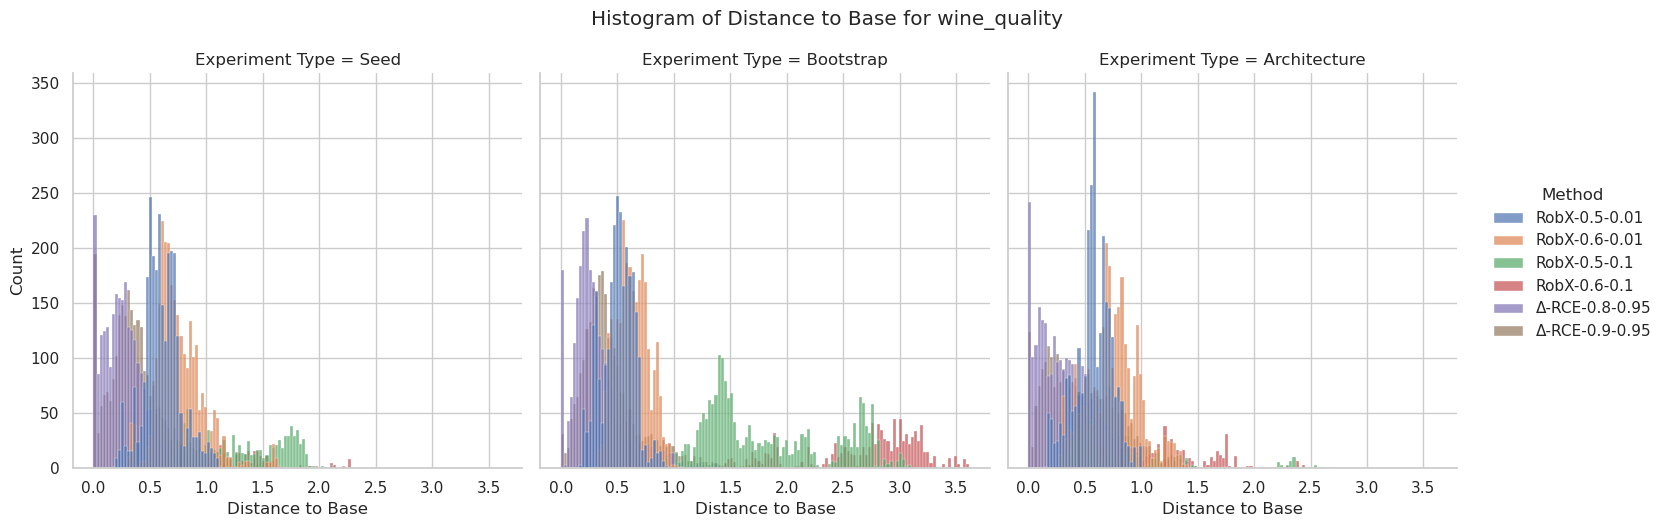

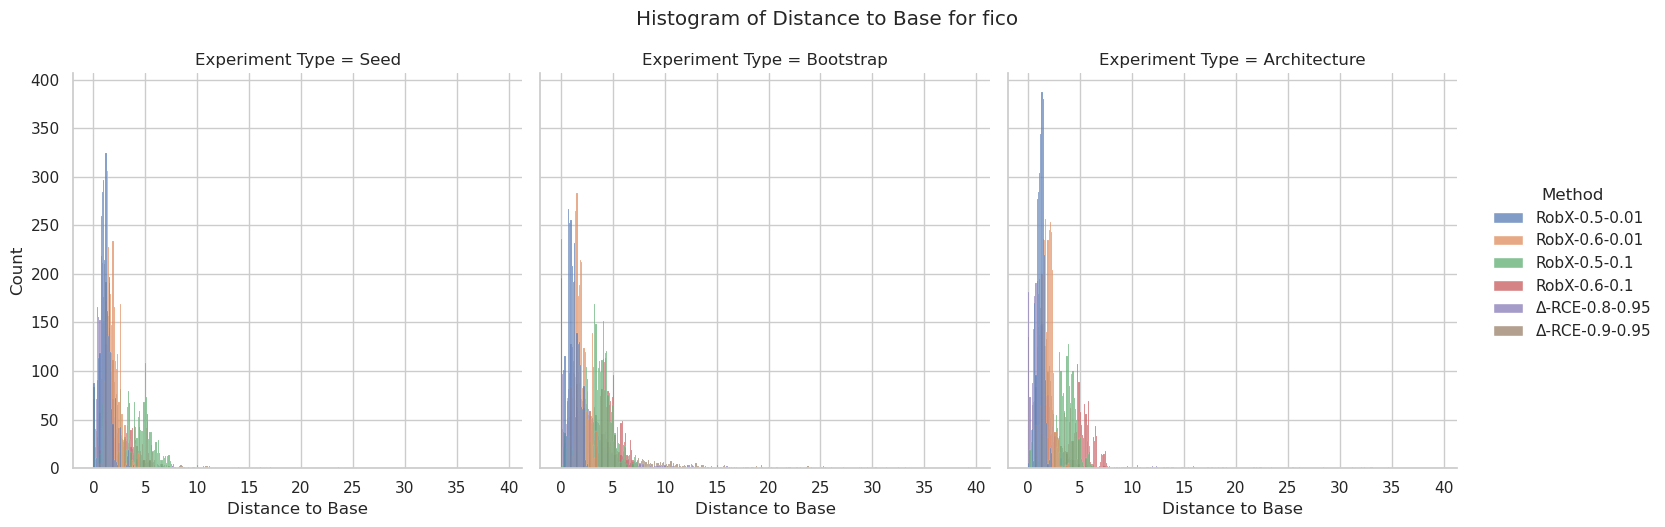

In [25]:

# methods_to_use = ['RobX-0.5-0.01','RobX-0.5-0.1', '\u0394-RCE-0.8-0.95', '\u0394-RCE-0.9-0.95', 'GrowingSpheres', 'Dice']
methods_to_use = ['RobX-0.5-0.01','RobX-0.5-0.1', 'RobX-0.6-0.01','RobX-0.6-0.1', '\u0394-RCE-0.8-0.95', '\u0394-RCE-0.9-0.95']

tmp_rce = nn_gs_df.copy().dropna()
tmp_rce['Method'] = '\u0394-RCE' + '-' + tmp_rce['delta_robustness'].astype(str) + '-' + tmp_rce['beta_confidence'].astype(str)

tmp_robx = robx_nn_gs_df.copy().dropna()
tmp_robx['Method'] = 'RobX' + '-' + tmp_robx['tau'].astype(str) + '-' + tmp_robx['variance'].astype(str)

tmp = pd.concat([tmp_robx, tmp_rce], axis=0, ignore_index=True)

columns={
    'robust_counterfactual_validity_model2': 'Empirical Robustness',
    'robust_counterfactual_L1_distance_from_base_cf': 'Distance to Base',
    'robust_counterfactual_proximityL1': 'Proximity L1',
    'robust_counterfactual_plausibility': 'Plausibility',
    'robust_counterfactual_discriminative_power': 'Discriminative Power',
    'dataset_name': 'Dataset',
    'experiment_type': 'Experiment Type',
    'Method': 'Method',
}


column = 'Distance to Base'
color_by = 'Method'


tmp = tmp.rename(columns=columns)
tmp = tmp[list(columns.values())]
tmp = tmp[tmp['Method'].isin(methods_to_use)]



for dataset in tmp['Dataset'].unique():
    _tmp = tmp[tmp['Dataset'] == dataset]
    # tmp = tmp[tmp['Experiment Type'] == experiment_type]
    sns.displot(data=_tmp, x=column, hue=color_by, kind='hist', alpha=0.7, col='Experiment Type')
    plt.suptitle(f'Histogram of {column} for {dataset}', x=0.5, y=1.05)
    plt.savefig(f'{images_dir}/histogram_{column}_{dataset}.png', dpi=300, bbox_inches='tight')



<div style="background-color: #AA0000; color: white; text-align: center; font-weight: bold">[4_1] Ablation (k mlps sweep)</div>

In [26]:
conf_sweep_results_path = results_path + '/confidence'
conf_sweep_raw_df = process_results(conf_sweep_results_path)

Reading results: 100%|██████████| 3/3 [00:02<00:00,  1.26it/s]


In [27]:
conf_sweep_raw_df['beta_confidence'].value_counts()

0.70    14400
0.80    14400
0.90    14282
0.95    14220
Name: beta_confidence, dtype: int64

In [28]:
conf_sweep_raw_df['delta_robustness'].value_counts()

0.7    19131
0.8    19091
0.9    19080
Name: delta_robustness, dtype: int64

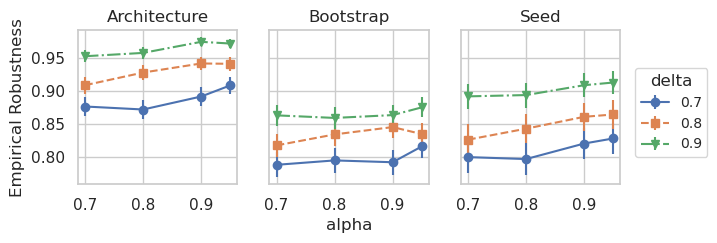

In [29]:
experiments = conf_sweep_raw_df['experiment_type'].unique()

figwidth = 7
fig, axes = plt.subplots(ncols=len(experiments), figsize=(figwidth, 2), sharex=True, sharey=True)

markers = ['o', 's', 'v', 'D']
linestyles = ['-', '--', '-.', ':']

for i, experiment in enumerate(experiments):
    
    ax = axes[i] if len(experiments) > 1 else axes
    
    tmp_conf_df = conf_sweep_raw_df.copy()
    tmp_conf_df = tmp_conf_df[tmp_conf_df['experiment_type'] == experiment]
    
    for j, delta in enumerate(tmp_conf_df['delta_robustness'].unique()):
        tmp_delta_df = tmp_conf_df[tmp_conf_df['delta_robustness'] == delta]
        # sns.lineplot(data=tmp_delta_df, x='beta_confidence', y='robust_counterfactual_validity_model2', ax=ax, label=f'delta={delta}')
        
        data = tmp_delta_df.groupby('beta_confidence')['robust_counterfactual_validity_model2'].mean()
        std = tmp_delta_df.groupby('beta_confidence')['robust_counterfactual_validity_model2'].std()
        cnt = tmp_delta_df.groupby('beta_confidence')['robust_counterfactual_validity_model2'].count()
        
        ax.errorbar(
            data.index, 
            data, 
            yerr=1.96 * std / np.sqrt(cnt),
            label=f'{delta}',
            marker = markers[j],
            linestyle = linestyles[j]
        )
        
    ax.set_title(experiment)
    if i == 1:
        ax.set_xlabel('alpha')
    if i == 0:
        ax.set_ylabel('Empirical Robustness')

plt.legend(title='delta', bbox_to_anchor=(1.05, 0.8), loc='upper left', ncol=1, fontsize=10)
    
plt.savefig(f'{images_dir}/4_1_empirical_robustness_vs_beta_confidence_and_delta.png', dpi=300, bbox_inches='tight')
    
   

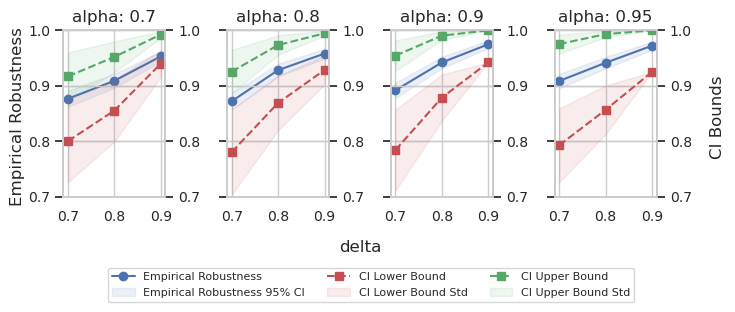

In [30]:
# Use only matplotlib 
# x-axis: delta_robsutness
# y-axis: empirical robustness
# twin y-axis: CI lower and upper bounds
# row: dataset
# col: experiment type

_tmp_df = conf_sweep_raw_df.copy()
_tmp_df = _tmp_df[_tmp_df['experiment_type'] == 'Architecture']
method='GrowingSpheres'

conf = sorted(_tmp_df['beta_confidence'].unique().tolist())
delta_robustness = _tmp_df['delta_robustness'].unique().tolist()
delta_robustness.sort()
# Set fontsize to 11
plt.close()
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(7, 2.5), sharex=True, sharey=True)
axes = axes.flatten()


for i, c in enumerate(conf):
    _df = _tmp_df[(_tmp_df['beta_confidence'] == c)]
    
    data = _df.groupby('delta_robustness')['robust_counterfactual_validity_model2'].mean()
    ax = axes[i]
    ax.plot(delta_robustness, data, marker='o', linestyle='-', color='b', label='Empirical Robustness')
    emprob_ci = 1.96 * _df.groupby('delta_robustness')['robust_counterfactual_validity_model2'].std() / np.sqrt(_df.groupby('delta_robustness')['robust_counterfactual_validity_model2'].count())
    ax.fill_between(delta_robustness, data - emprob_ci, data + emprob_ci, color='b', alpha=0.1, label='Empirical Robustness 95% CI')
    
    ax.set_title(f'alpha: {c}')
    
    data_lower = _df.groupby('delta_robustness')['lower_bound_beta'].mean()
    data_upper = _df.groupby('delta_robustness')['upper_bound_beta'].mean()
    
    ax2 = ax.twinx()
    
    ax2.plot(delta_robustness, data_lower, marker='s', linestyle='--', color='r', label='CI Lower Bound')
    # add yerr for lower bound
    lb_std = _df.groupby('delta_robustness')['lower_bound_beta'].std()
    ax2.fill_between(delta_robustness, data_lower - lb_std, data_lower + lb_std, color='r', alpha=0.1, label='CI Lower Bound Std')


    ax2.plot(delta_robustness, data_upper, marker='s', linestyle='--', color='g', label='CI Upper Bound')
    # add yerr
    ub_std = _df.groupby('delta_robustness')['upper_bound_beta'].std()
    ax2.fill_between(delta_robustness, data_upper - ub_std, data_upper + ub_std, color='g', alpha=0.1, label='CI Upper Bound Std')
    

    l = 0.7
    ax.set_ylim(l, 1)
    ax2.set_ylim(l, 1)
    ax.set_xticks([0.7, 0.8, 0.9])
    ax.set_yticks([0.7, 0.8, 0.9, 1])
    ax2.set_yticks([0.7, 0.8, 0.9, 1])
        
    # Decrease font size of the labels
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax2.tick_params(axis='both', which='major', labelsize=10)
    
    # Turn off label ticks for ax2 on the plots that are not on the right
    if j != len(experiment_types) - 1:
        ax2.set_yticklabels([])
        
    handles, labels = ax.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    
    handles_combined = handles + handles2
    labels_combined = labels + labels2


# Add one xlabel for all the plots
fig.text(0.5, -0.04, 'delta', ha='center')
fig.text(0.00, 0.5, 'Empirical Robustness', va='center', rotation='vertical')
fig.text(1.0, 0.5, 'CI Bounds', va='center', rotation='vertical')

fig.legend(bbox_to_anchor=(0.9, -0.08), handles=handles_combined, labels=labels_combined, ncol=3, fontsize=8)
   
plt.tight_layout()
plt.savefig(f'{images_dir}/4_1_empirical_robustness_ci_bounds_vs_confidence.png', dpi=300, bbox_inches='tight')

plt.show()


<div style="background-color: #AA0000; color: white; text-align: center; font-weight: bold">[4_2] Ablation (k)</div>

In [31]:
k_sweep_results_path = results_path + '/k'
k_raw_df = process_results(k_sweep_results_path)

Reading results: 100%|██████████| 3/3 [00:03<00:00,  1.22s/it]


In [32]:
k_raw_df['delta_robustness'].value_counts()

0.7    26263
0.8    26220
0.9    26220
Name: delta_robustness, dtype: int64

In [33]:
k_raw_df['k_mlps_in_B'].value_counts()

8     16200
16    16200
24    10801
48    10800
40    10800
32    10800
56     3102
Name: k_mlps_in_B, dtype: int64

In [45]:
# Drop where k=56 as this run crashed
k_raw_df = k_raw_df[k_raw_df['k_mlps_in_B'] != 56]

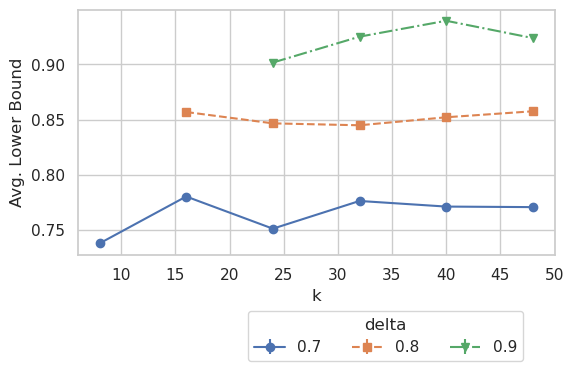

In [46]:
fig, axes = plt.subplots(figsize=(6, 4))

markers = ['o', 's', 'v']
linestyles = ['-', '--', '-.']

for i, delta in enumerate(k_raw_df['delta_robustness'].unique()):
    _df = k_raw_df[k_raw_df['delta_robustness'] == delta]
    data = _df.groupby('k_mlps_in_B')['lower_bound_beta'].mean()
    std = _df.groupby('k_mlps_in_B')['lower_bound_beta'].std()
    cnt = _df.groupby('k_mlps_in_B')['lower_bound_beta'].count()
    
    axes.errorbar(
        data.index, 
        data, 
        yerr=1.96 * std / np.sqrt(cnt),
        label=f'{delta}',
        marker = markers[i],
        linestyle = linestyles[i]
    )

plt.legend(title='delta', bbox_to_anchor=(0.95, -0.2), ncol=5)
plt.xlabel('k')
plt.ylabel('Avg. Lower Bound')
plt.tight_layout()

plt.savefig(f'{images_dir}/4_2_lb_beta_vs_k_mlps.png', dpi=300, bbox_inches='tight')

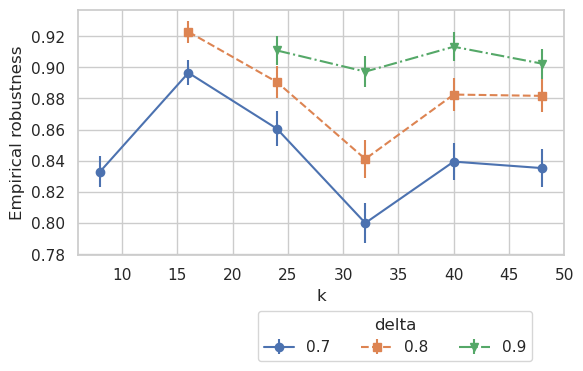

In [47]:
fig, axes = plt.subplots(figsize=(6, 4))

markers = ['o', 's', 'v']
linestyles = ['-', '--', '-.']

for i, delta in enumerate(k_raw_df['delta_robustness'].unique()):
    _df = k_raw_df[k_raw_df['delta_robustness'] == delta]
    data = _df.groupby('k_mlps_in_B')['robust_counterfactual_validity_model2'].mean()
    std = _df.groupby('k_mlps_in_B')['robust_counterfactual_validity_model2'].std()
    cnt = _df.groupby('k_mlps_in_B')['robust_counterfactual_validity_model2'].count()
    
    axes.errorbar(
        data.index, 
        data, 
        yerr=1.96 * std / np.sqrt(cnt),
        label=f'{delta}',
        marker = markers[i],
        linestyle = linestyles[i]
    )

plt.legend(title='delta', bbox_to_anchor=(0.95, -0.2), ncol=5)
plt.xlabel('k')
plt.ylabel('Empirical robustness')
plt.tight_layout()

plt.savefig(f'{images_dir}/4_2_ER_vs_k_mlps.png', dpi=300, bbox_inches='tight')

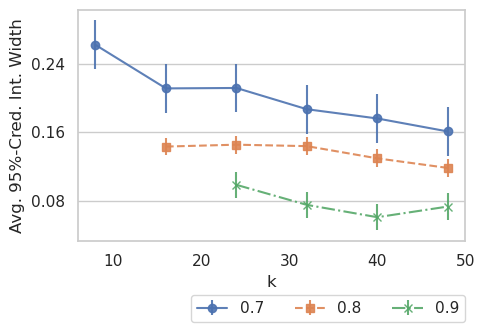

In [48]:
from matplotlib.ticker import FormatStrFormatter

_tmp_df = k_raw_df.copy()
_tmp_df = _tmp_df[_tmp_df['experiment_type'] == 'Architecture']

fig, ax = plt.subplots(figsize=(5, 3))

_tmp_df['lb-ub'] = _tmp_df['upper_bound_beta'] - _tmp_df['lower_bound_beta']
delts = _tmp_df['delta_robustness'].unique()
ks = sorted(_tmp_df['k_mlps_in_B'].unique())
av_ci_width = _tmp_df.groupby(['k_mlps_in_B', 'delta_robustness'])['lb-ub'].mean().reset_index()

markers = ['o', 's', 'x', 'd', '^']
linestyles = ['-', '--', '-.', ':', '-']

for i, delta in enumerate(delts):
    data = av_ci_width[av_ci_width['delta_robustness'] == delta]
    plt.errorbar(data['k_mlps_in_B'], 
                 data['lb-ub'], 
                 marker=markers[i],
                 linestyle=linestyles[i],
                 label=f'{delta}', 
                 yerr=1.96 * data['lb-ub'].std() / np.sqrt(data['lb-ub'].count()),
                 alpha=0.9
    )

# format y-axis to round to 2 decimal places
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# leave only 4 ticks on the y-axis
ax.yaxis.set_major_locator(plt.MaxNLocator(4))

# Remove vertical gridlines
ax.grid(axis='x')

plt.legend(bbox_to_anchor=(1.02, -0.2), ncol=5)
plt.xlabel('k')
plt.ylabel('Avg. 95%-Cred. Int. Width')
# plt.tight_layout()

plt.savefig(f'{images_dir}/4_2_ci_width_vs_k_mlps.png', dpi=300, bbox_inches='tight')

/tmp/ipykernel_110164/2229295343.py:109: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


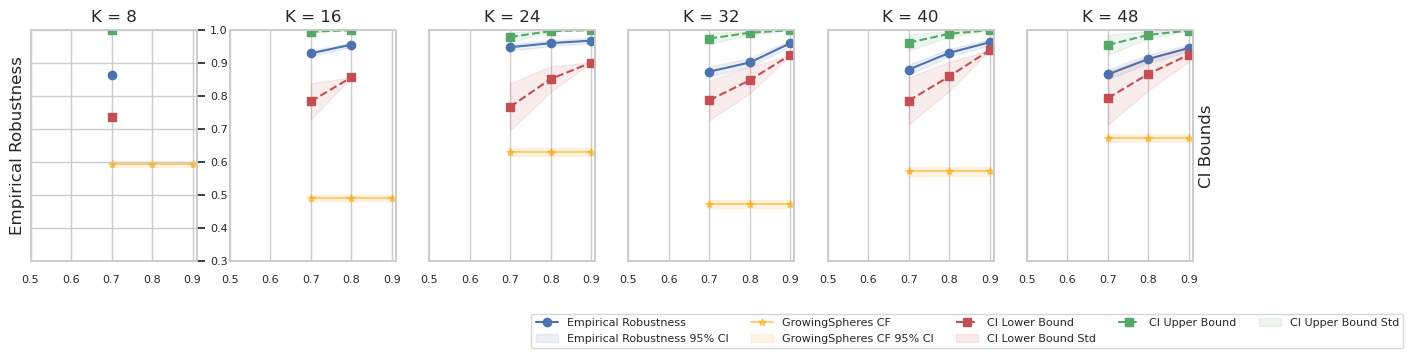

In [71]:
# Use only matplotlib 
# x-axis: delta_robsutness
# y-axis: empirical robustness
# twin y-axis: CI lower and upper bounds
# row: dataset
# col: experiment type

_tmp_df = k_raw_df.copy()
_tmp_df = _tmp_df[_tmp_df['experiment_type'] == 'Architecture']
method='GrowingSpheres'

ks = sorted(_tmp_df['k_mlps_in_B'].unique().tolist())
delta_robustness = _tmp_df['delta_robustness'].unique().tolist()
delta_robustness.sort()
# Set fontsize to 11

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15, 3), sharex=True, sharey=True)
axes = axes.flatten()


for i, k in enumerate(ks):
    _df = _tmp_df[(_tmp_df['k_mlps_in_B'] == k)]
    
    data = _df.groupby('delta_robustness')['robust_counterfactual_validity_model2'].mean()
    ax = axes[i]
    ax.plot(delta_robustness, data, marker='o', linestyle='-', color='b', label='Empirical Robustness')
    emprob_ci = 1.96 * _df.groupby('delta_robustness')['robust_counterfactual_validity_model2'].std() / np.sqrt(_df.groupby('delta_robustness')['robust_counterfactual_validity_model2'].count())
    ax.fill_between(delta_robustness, data - emprob_ci, data + emprob_ci, color='b', alpha=0.1, label='Empirical Robustness 95% CI')
    
    ax.set_title(f'K = {k}')
    
    if i == 0:
        ax.set_ylabel('Empirical Robustness')
    
    
    data_lower = _df.groupby('delta_robustness')['lower_bound_beta'].mean()
    data_upper = _df.groupby('delta_robustness')['upper_bound_beta'].mean()
    
    ax2 = ax.twinx()
    
    ax2.plot(delta_robustness, data_lower, marker='s', linestyle='--', color='r', label='CI Lower Bound')
    # add yerr for lower bound
    lb_std = _df.groupby('delta_robustness')['lower_bound_beta'].std()
    ax2.fill_between(delta_robustness, data_lower - lb_std, data_lower + lb_std, color='r', alpha=0.1, label='CI Lower Bound Std')


    
    ax2.plot(delta_robustness, data_upper, marker='s', linestyle='--', color='g', label='CI Upper Bound')
    # add yerr
    ub_std = _df.groupby('delta_robustness')['upper_bound_beta'].std()
    ax2.fill_between(delta_robustness, data_upper - ub_std, data_upper + ub_std, color='g', alpha=0.1, label='CI Upper Bound Std')
    
    
    if i == len(ks) - 1:
        ax2.set_ylabel('CI Bounds')
    
    
    #Plot baseline
    for m, color in zip(['GrowingSpheres'], ['orange']):
        __df = _df[_df['base_cf_method'] == m]
        base = __df['base_counterfactual_validity_model2'].mean()
        base_std = __df['base_counterfactual_validity_model2'].std()
        base_ci = 1.96 * base_std / np.sqrt(__df['base_counterfactual_validity_model2'].count())
        ax.plot(delta_robustness, [base] * len(delta_robustness), color=color, linestyle='-', label=f'{m} CF', marker='*', alpha=0.5)
        ax.fill_between(delta_robustness, base - base_ci, base + base_ci, color=color, alpha=0.1, label=f'{m} CF 95% CI')
    
    l = 0.3
    ax.set_ylim(l, 1)
    ax2.set_ylim(l, 1)
    ax.set_xticks([0.5, 0.6, 0.7, 0.8, 0.9])
    # Make x-axis labels more coarse i.e. only show rounded to tenths

    # ax_lim = ax.get_xlim()
    # ax.set_xticks(np.arange(ax_lim[0], ax_lim[1], 0.1).round(1))
    
    if i == 4:
        ax_legend_handles, ax_legend_labels = ax.get_legend_handles_labels()
        ax2_legend_handles, ax2_legend_labels = ax2.get_legend_handles_labels()
        
        ax.legend(ax_legend_handles + ax2_legend_handles, 
                    ax_legend_labels + ax2_legend_labels, 
                    ncol=5, 
                    loc='lower right',
                    bbox_to_anchor=(3.5, -0.4),
                    fontsize=8
        )
        
        
    # Decrease font size of the labels
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax2.tick_params(axis='both', which='major', labelsize=8)
    
    # Turn off label ticks for ax2 on the plots that are not on the right
    
    if i != 0:
        ax2.set_yticklabels([])
        ax2.set_yticks([])
        ax.set_yticks([])
        ax.set_yticklabels([])
    



dataset =  _tmp_df['dataset_name'].unique()[0]
experiment_type = _tmp_df['experiment_type'].unique()[0]
# plt.suptitle(f'Empirical Robustness vs K MLPs in B (Dataset: {dataset}, Experiment Type: {experiment_type})')        
plt.savefig(f'{images_dir}/4_2_empirical_robustness_ci_bounds_vs_k.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()


<div style="background-color: #AA0000; color: white; text-align: center; font-weight: bold">[4_3] Ablation (generalizations)</div>

In [37]:
generalization_results_path = results_path + '/generalization'
gen_raw_df = process_results(generalization_results_path)

Reading results: 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]


In [38]:
gen_raw_df['experiment_type'].value_counts()

Architecture    10301
Name: experiment_type, dtype: int64

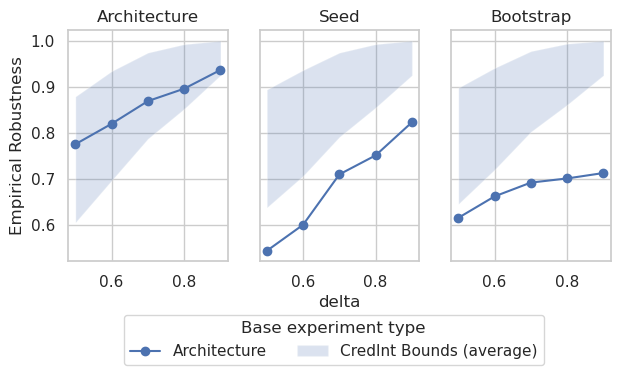

In [39]:
generalizations = gen_raw_df['experiment_generalization_type'].unique()
experiments = gen_raw_df['experiment_type'].unique()

fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(7, 3), sharex=True, sharey=True)
axes = axes.flatten()
for i, gen in enumerate(generalizations):
    for j, experiment in enumerate(experiments):
        tmp_gen_df = gen_raw_df.copy()
        tmp_gen_df = tmp_gen_df[(tmp_gen_df['experiment_type'] == experiment) & (tmp_gen_df['experiment_generalization_type'] == gen)]

        lbs = tmp_gen_df['lower_bound_beta']
        ubs = tmp_gen_df['upper_bound_beta']
        
        tmp_grp = tmp_gen_df.groupby('delta_robustness')['robust_counterfactual_validity_model2'].mean()

        axes[i].plot(tmp_grp.index, tmp_grp, marker='o', linestyle='-', label=experiment)
        
        tmp_grp_lower = tmp_gen_df.groupby('delta_robustness')['lower_bound_beta'].mean()
        tmp_grp_upper = tmp_gen_df.groupby('delta_robustness')['upper_bound_beta'].mean()
        
        axes[i].fill_between(tmp_grp.index, tmp_grp_lower, tmp_grp_upper, alpha=0.2, label='CredInt Bounds (average)')
        
        axes[i].set_title(gen)
        if i == 1:
            axes[i].set_xlabel('delta')
        
        if i == 0:
            axes[i].set_ylabel('Empirical Robustness')
            
        if i == 1:
            axes[i].legend(title='Base experiment type', loc='upper left', ncol=2, bbox_to_anchor=(-0.9, -0.2))
        
            

# plt.tight_layout()

plt.savefig(f'{images_dir}/4_3_empirical_robustness_vs_delta_generalization.png', dpi=300, bbox_inches='tight')
        

<div style="background-color: #AA0000; color: white; text-align: center; font-weight: bold">[5] Time</div>

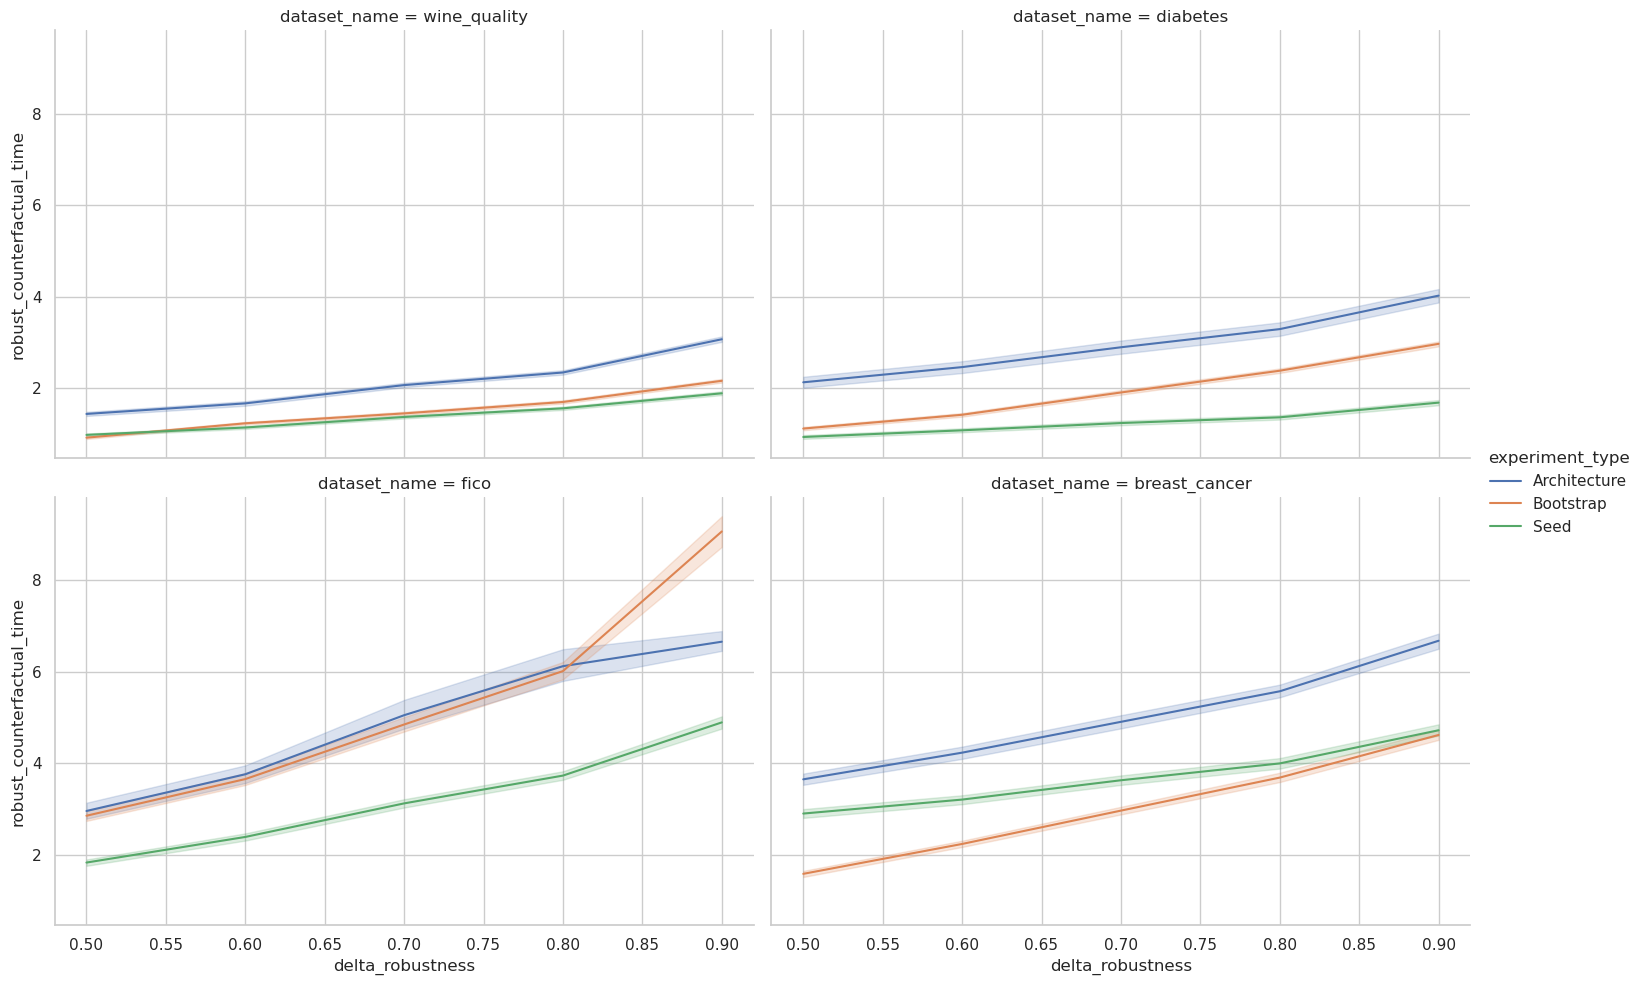

In [40]:
sns.relplot(data=nn_gs_df, x='delta_robustness', y='robust_counterfactual_time', hue='experiment_type', col='dataset_name', kind='line', height=5, aspect=1.5, col_wrap=2)
# plt.xlabel('Delta Robustness')
# plt.ylabel('Robust CF generation time (s)')
plt.savefig(f'{images_dir}/5_1_robust_cf_generation_time_delta.png', dpi=300, bbox_inches='tight')

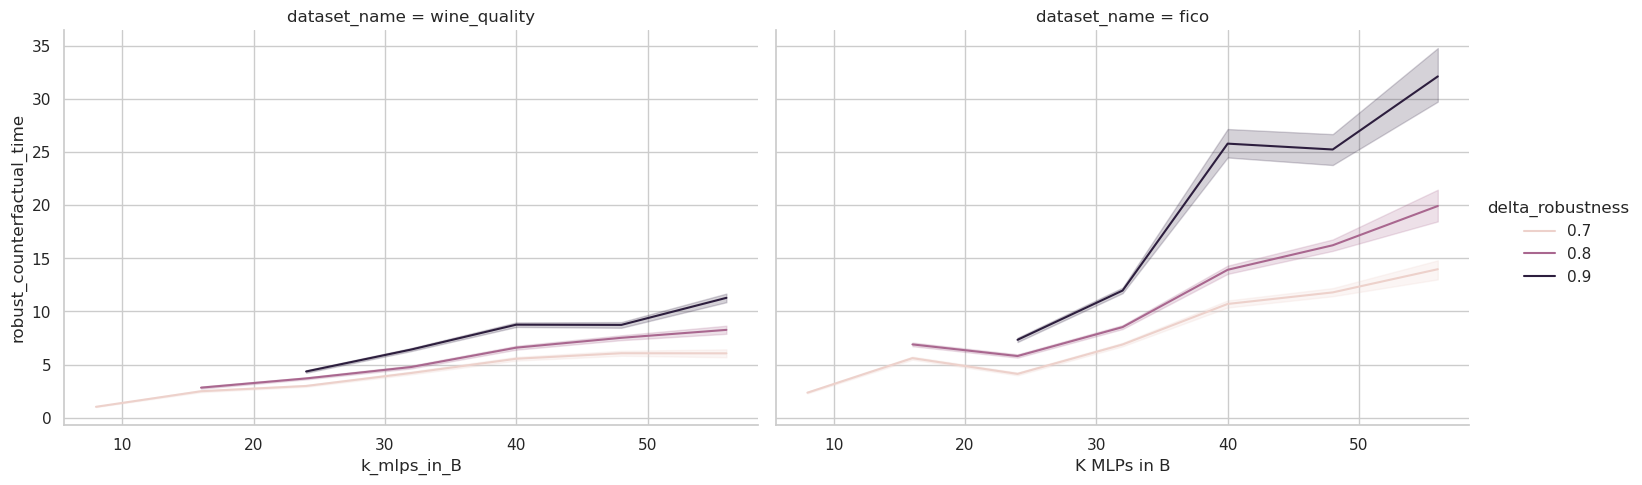

In [41]:
sns.relplot(data=k_raw_df, x='k_mlps_in_B', y='robust_counterfactual_time', hue='delta_robustness', col='dataset_name', kind='line', height=5, aspect=1.5)
plt.xlabel('K MLPs in B')
plt.ylabel('Robust CF generation time (s)')
plt.savefig(f'{images_dir}/5_2_robust_cf_generation_time_k.png', dpi=300, bbox_inches='tight')

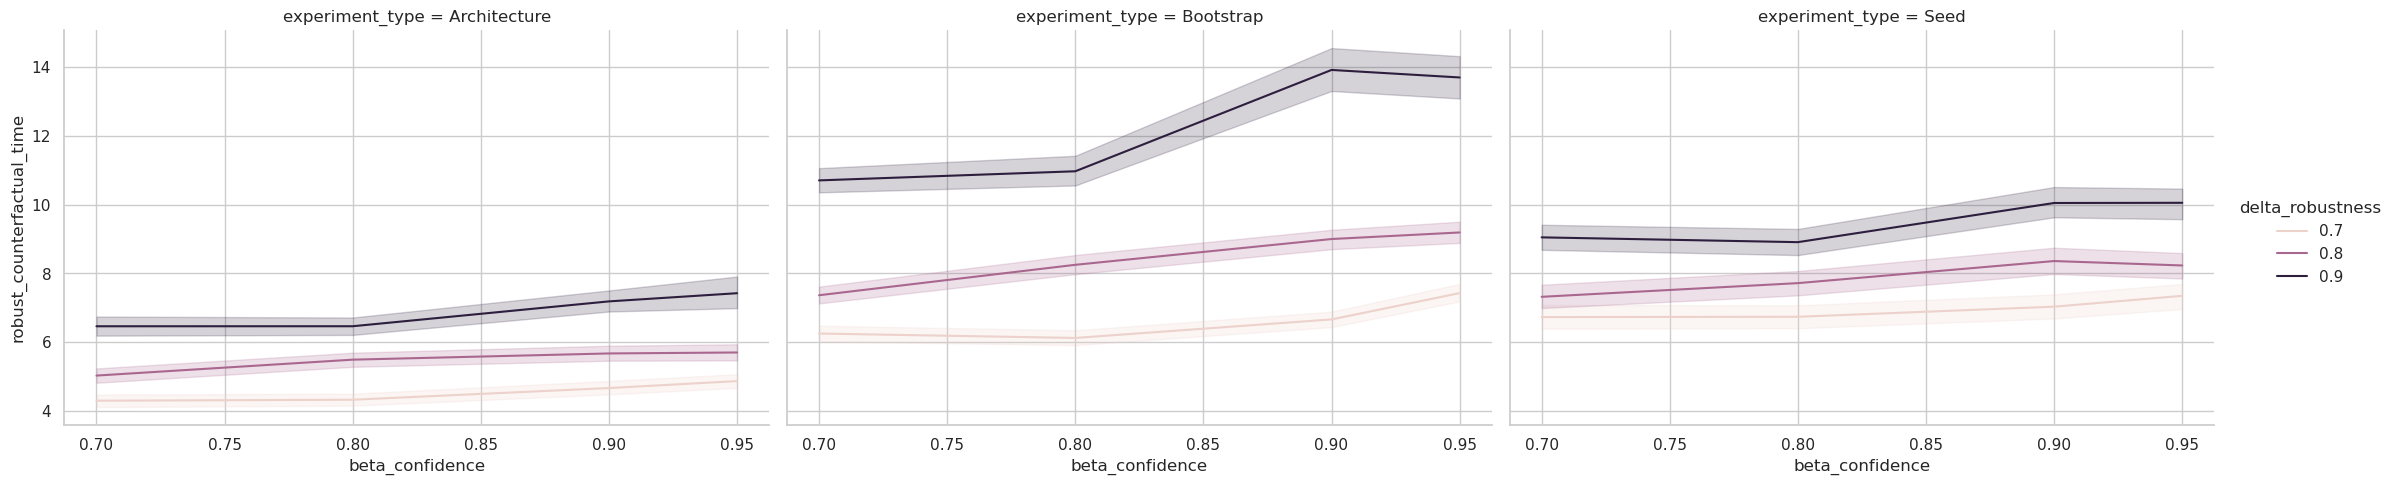

In [42]:
sns.relplot(data=conf_sweep_raw_df, x='beta_confidence', y='robust_counterfactual_time', hue='delta_robustness', col='experiment_type', kind='line', height=5, aspect=1.5)
plt.savefig(f'{images_dir}/5_3_robust_cf_generation_time_beta_confidence.png', dpi=300, bbox_inches='tight')

In [43]:
# Create a scatterplot time vs empirical robustness
cutoff_up = 0.8
cutoff_low = 0.2
exp = 'Seed'

# Print average time for each experiment type
print('BetaROB Time')
tmp_beta = raw_df[raw_df['experiment_type'] == exp] 
quantile80 = tmp_beta['robust_counterfactual_time'].quantile(cutoff_up)
quantile20 = tmp_beta['robust_counterfactual_time'].quantile(cutoff_low)
tmp_beta = tmp_beta[tmp_beta['robust_counterfactual_time'] < quantile80]
tmp_beta = tmp_beta[tmp_beta['robust_counterfactual_time'] > quantile20]
print(tmp_beta.groupby(['experiment_type', 'dataset_name'])['robust_counterfactual_time'].mean().sort_index())

print('RobX Time')
tmp_robx = robx_raw_df[robx_raw_df['experiment_type'] == exp]
quantile80 = tmp_robx['robust_counterfactual_time'].quantile(cutoff_up)
quantile20 = tmp_robx['robust_counterfactual_time'].quantile(cutoff_low)
tmp_robx = tmp_robx[tmp_robx['robust_counterfactual_time'] < quantile80]
tmp_robx = tmp_robx[tmp_robx['robust_counterfactual_time'] > quantile20]
print(tmp_robx.groupby(['experiment_type', 'dataset_name'])['robust_counterfactual_time'].mean().sort_index())

print('Base CF Time')
tmp_base = raw_df[raw_df['experiment_type'] == exp]
quntile80 = tmp_base['base_counterfactual_time'].quantile(cutoff_up)
quantile20 = tmp_base['base_counterfactual_time'].quantile(cutoff_low)
tmp_base = tmp_base[tmp_base['base_counterfactual_time'] < quantile80]
tmp_base = tmp_base[tmp_base['base_counterfactual_time'] > quantile20]
print(tmp_base.groupby(['experiment_type', 'dataset_name'])['base_counterfactual_time'].mean().sort_index())

BetaROB Time
experiment_type  dataset_name 
Seed             breast_cancer    2.178209
                 diabetes         1.307726
                 fico             2.222163
                 wine_quality     1.326638
Name: robust_counterfactual_time, dtype: float64
RobX Time
experiment_type  dataset_name 
Seed             breast_cancer    0.572322
                 diabetes         0.278550
                 fico             0.740911
                 wine_quality     0.646489
Name: robust_counterfactual_time, dtype: float64
Base CF Time
experiment_type  dataset_name 
Seed             breast_cancer    0.099611
                 diabetes         0.047365
                 fico             0.077116
                 wine_quality     0.082889
Name: base_counterfactual_time, dtype: float64
